In [64]:
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
from scipy.stats import ttest_ind


# Question 1

### Defining Linear Regression Class

In [65]:

class Linear_Regression:

    def __init__(self,criterion = 'L2'):
        self.criterion = criterion
        self.parameters = None

    def fit(self,X,y,max_iter=1000,learning_rate = None):
        """
            This function will fit the model on the data that is passed as parameter 
            and for estimating the parameters we have used the Gradient descent method 
            and for learning parameter we have used the Exact Line Search method (for calculating the stepsize)
            X := Features
            y := True Labels
            max_iter := Maximum Iteration for Gradient descent
            learning_rate : = 

        """
        num_param = X.shape[1]+1
        A = np.insert(X, 0, np.ones(X.shape[0]), axis=1)
        self.parameters = np.zeros(num_param)
        eps = 0.0000001
        grad_norm = 1
        for i in range(max_iter):
            if(grad_norm<eps):
                break
            grad = self.__compute_grad(A,y)
            step_size = self.__compute_step_size(grad,A)
            self.parameters = self.parameters - step_size*grad
            grad_norm = np.linalg.norm(A@self.parameters - y)**2/X.shape[0]
            #print(grad_norm)

    def fit2(self,X,y):
        num_param = X.shape[1]+1
        A = np.insert(X, 0, np.ones(X.shape[0]), axis=1)
        self.parameters = np.zeros(num_param)
        self.parameters = np.linalg.inv(A.T@A)@A.T@y

    def __compute_grad(self,X,y):
        """
         This function returns gradient of Linear Regression expression
         X := Features
         y := labels
        """
        return X.T@(X@self.parameters-y)

    def __compute_step_size(self,grad,X):
        return grad.T@grad/(grad.T@(X.T@X)@grad)

    def predict(self,X):
        A = np.insert(X, 0, np.ones(X.shape[0]), axis=1)
        return A@self.parameters

    def mean_squared_error(self,y_pred,y):
        return np.linalg.norm(y_pred-y)**2/len(y)
    
    def mean_absolute_error(self, y_pred, y):
        return np.mean(np.abs(y - y_pred))
    
    def p_value(self, y_pred, y):
        return ttest_ind(y, y_pred).pvalue
    
    def generate_plot(self, x_test, y_pred_test):
        x = x_test[0:499, 0]
        y = x_test[0:499, 1]
        z = y_pred_test[0:499]

        w = self.parameters
        
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(x, y, z, c='red')
        x_surf, y_surf = np.meshgrid(x, y)
        plane = w[0] + w[1]*x_surf + w[2]*y_surf
        ax.plot_surface(x_surf, y_surf, plane, color='g', alpha=0.3)
        plt.xlabel('x1')
        plt.ylabel('x2')
        plt.title('Regression Plot')


## Importing Test and Training data 

In [66]:
# Training Data
p1_train = np.genfromtxt("p1_train.csv", delimiter=",", dtype=float)

# Test Data
p1_test = np.genfromtxt("p1_test.csv", delimiter=",", dtype=float)

# Splitting the data in labels and features
x_train, y_train = p1_train[:,0:2], p1_train[:, 2]
x_test, y_test = p1_test[:,0:2], p1_test[:, 2]

## Training Model

In [67]:
# Creating the Object/Model of Linear Regression class
model = Linear_Regression()

# Training model on the train data 
model.fit(x_train, y_train)

# Obtaining Predictions
y_pred_train = model.predict(x_train)

print("Training MSE = " + str(model.mean_squared_error(y_train, y_pred_train)))



Training MSE = 5.059684615643721


## Testing 

Testing MSE = 5.046436009355075
Testing Mean Absolute Error = 1.7990800542854428
P-Value = 0.9084779936763924
Parameters:
[ 2.97890109 -1.99964941 -0.99731089]


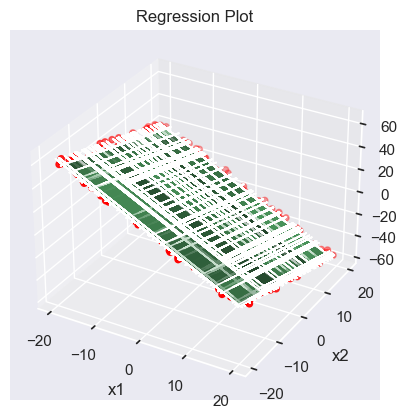

In [156]:
# Obtaining Predictions on test data
y_pred_test = model.predict(x_test)

# Printing the Mean Squared Error , Mean Absolute Value and P-value
print("Testing MSE = " + str(model.mean_squared_error(y_test, y_pred_test)))
print("Testing Mean Absolute Error = " + str(model.mean_absolute_error(y_test, y_pred_test)))
print("P-Value = " + str(model.p_value(y_test, y_pred_test)))
model.generate_plot(x_test, y_pred_test)
print("Parameters:")
print(model.parameters)



# Question 2

## Importing Training and Test Data

In [70]:
# Training Data
p2_train = np.genfromtxt("p2_train.csv", delimiter=",", dtype=float)

# Test Data
p2_test = np.genfromtxt("p2_test.csv", delimiter=",", dtype=float)

# Splitting the features and labels
x2_train, y2_train = p2_train[:,0:3], p2_train[:, 3]
x2_test, y2_test = p2_test[:,0:3], p2_test[:, 3]

## Normalizing labels

In [71]:
# Normalizing labels
y2_train = y2_train/(np.max(y2_train) - np.min(y2_train))
y2_test = y2_test/(np.max(y2_test) - np.min(y2_test))

## Kernel Functions

In [72]:
def kernel_poly(x):
    x_updated = np.zeros([x.shape[0], 12])

    x_updated[:, 0] = x[:, 0]**3
    x_updated[:, 1] = x[:, 0]**2
    x_updated[:, 2] = x[:, 0]**1
    
    
    x_updated[:, 3] = x[:, 1]**3
    x_updated[:, 4] = x[:, 1]**2
    x_updated[:, 5] = x[:, 1]**1

    x_updated[:, 6] = x[:, 2]**3
    x_updated[:, 7] = x[:, 2]**2
    x_updated[:, 8] = x[:, 2]**1

    x_updated[:, 6] = x[:, 0]*x[:,1]
    x_updated[:, 7] = x[:, 1]*x[:,2]
    x_updated[:, 8] = x[:, 2]*x[:,0]


    return x_updated
    


def kernel_exp(x):
    x_updated = np.zeros([x.shape[0], 9])

    x_updated[:,0] = np.exp(x[:, 0])/(1 + x[:, 0]**2) 
    x_updated[:,1] = np.exp(x[:, 0])*np.exp(x[:, 1])
    x_updated[:,2] = np.exp(x[:, 0])

    x_updated[:,3] = np.exp(x[:, 1])/(1 + x[:, 1]**2)
    x_updated[:,4] = np.exp(x[:, 1])*np.exp(x[:, 2])
    x_updated[:,5] = np.exp(x[:, 1])

    x_updated[:,6] = np.exp(x[:, 2])/(1 + x[:, 2]**2)
    x_updated[:,7] = np.exp(x[:, 2])*np.exp(x[:, 0])
    x_updated[:,8] = np.exp(x[:, 2])
    
    return x_updated


def kernel_sin(x):
    x_updated = np.zeros([x.shape[0], 9])

    x_updated[:,0] = np.sin(x[:, 0])
    x_updated[:,1] = np.cos(x[:, 0])

    x_updated[:,2] = np.sin(x[:, 1])
    x_updated[:,3] = np.cos(x[:, 1])
    
    x_updated[:,4] = np.sin(x[:, 2])
    x_updated[:,5] = np.cos(x[:, 2])

    x_updated[:,6] = np.sin(x[:, 0])*np.cos(x[:, 1])
    x_updated[:,7] = np.sin(x[:, 1])*np.cos(x[:, 2])
    x_updated[:,8] = np.sin(x[:, 2])*np.cos(x[:, 0])
    return x_updated




## Kernel 1

### Training

In [73]:
#Obtaining model 
model1 = Linear_Regression()

# transforming data for polynomial kernel
x2_train_kernel1 = kernel_poly(x2_train)

# Training model on the train data 
model1.fit(x2_train_kernel1, y2_train)


### Testing

In [74]:
# 
x2_test_kernel1 = kernel_poly(x2_test)

# Obtaining Predictions on test data
y_pred_test = model1.predict(x2_test_kernel1)

# Printing the Mean Squared Error , Mean Absolute Value and P-value
print("Testing MSE = " + str(model1.mean_squared_error(y2_test, y_pred_test)))
print("Testing Mean Absolute Error = " + str(model1.mean_absolute_error(y2_test, y_pred_test)))
print("P-Value = " + str(model1.p_value(y2_test, y_pred_test)))

Testing MSE = 0.003999819586830499
Testing Mean Absolute Error = 0.04535308237060514
P-Value = 0.03555983184498295


## Kernel 2

### Training 

In [75]:
#Obtaining model 
model1 = Linear_Regression()

# transforming data for trigonometric kernel 
x2_train_kernel2 = kernel_sin(x2_train)

# Training model on the train data 
model1.fit(x2_train_kernel2, y2_train)


In [76]:
# 
x2_test_kernel2 = kernel_sin(x2_test)

# Obtaining Predictions on test data
y_pred_test = model1.predict(x2_test_kernel2)

# Printing the Mean Squared Error, Mean Absolute Value and P-value
print("Testing MSE = " + str(model1.mean_squared_error(y2_test, y_pred_test)))
print("Testing Mean Absolute Error = " + str(model1.mean_absolute_error(y2_test, y_pred_test)))
print("P-Value = " + str(model1.p_value(y2_test, y_pred_test)))

Testing MSE = 0.012484681280717252
Testing Mean Absolute Error = 0.07611006988389991
P-Value = 0.031370778251975144


## Kernel 3

### Training 

In [77]:
#Obtaining model 
model1 = Linear_Regression()

# transforming data for exponential kernel 
x2_train_kernel3 = kernel_exp(x2_train)

# Training model on the train data 
model1.fit(x2_train_kernel3, y2_train)


### Testing

In [78]:
# 
x2_test_kernel3 = kernel_exp(x2_test)

# Obtaining Predictions on test data
y_pred_test = model1.predict(x2_test_kernel3)

# Printing the Mean Squared Error, Mean Absolute Value and P-value
print("Testing MSE = " + str(model1.mean_squared_error(y2_test, y_pred_test)))
print("Testing Mean Absolute Error = " + str(model1.mean_absolute_error(y2_test, y_pred_test)))
print("P-Value = " + str(model1.p_value(y2_test, y_pred_test)))

Testing MSE = 0.015229764275978292
Testing Mean Absolute Error = 0.06872148210971306
P-Value = 1.1045940676706493e-226


# Classification Algorithms

# Bayes Classifier

In [79]:
class Bayers_Classifier:

    def __init__(self):
        self.num_classes = None
        self.Bayes_parameters = None
        self.prior = None
        self.Bayes_class_cond = None

    def __Separate_data_by_classes(self,data,first_label):
        Data_by_classes = []
        for i in range(self.num_classes):
            temp = data[data[:,-1]==i+first_label][:,0:-1]
            Data_by_classes.append(temp)
        return Data_by_classes

    def __Maximum_likelihood_Estimator(self,data,density):
        if(density == 'Gaussian'):
            mean = np.mean(data,axis = 0)
            #cov_matrix = np.cov(data.T)
            cov_matrix = np.eye(data.shape[1])
            return [mean,cov_matrix]
        
        elif(density == 'Laplacian'):
            median = np.median(data,axis = 0)
            std_array = np.zeros(data.shape[1])
            for i in range(data.shape[1]):
              b = np.mean(abs(data[:,i] - median[i]))
              std_array[i] = b

            #print(median)
            #print(std_array)
            return [median,std_array]


    def __compute_density(self,x,index,density):
        if (density == 'Gaussian'):
            mean = self.Bayes_parameters[index][0]
            #cov = self.Bayes_parameters[index][1]
            z = x - mean
            #print(z)
            #cov_det = np.sqrt(np.linalg.det(cov))
            #return np.exp(-0.5*z@np.linalg.inv(cov)@z.T)/cov_det
            return np.exp(-0.5*z@z.T)

        elif(density == 'Laplacian'):           
            px = 1
            for i in range(len(x)):
              median = self.Bayes_parameters[index][0][i]
              std = self.Bayes_parameters[index][1][i]
              px *= (1/std)*np.exp(-abs(x[i]-median)/std)
            
            return px
      

    def __Posterior(self,x):
        posterior = np.zeros(self.num_classes) 
        for i in range(self.num_classes):
            posterior[i] = self.__compute_density(x,i,self.Bayes_class_cond)

        return posterior*self.Bayes_prior



    def fit(self,data,class_conditional_density):
        unique , label_count = np.unique(data[:,-1],return_counts = True)
        self.num_classes = len(unique)
        first_label = np.min(unique)
        self.Bayes_class_cond = class_conditional_density
        Data_by_classes = self.__Separate_data_by_classes(data,first_label)
        self.Bayes_parameters = []
        for i in range(self.num_classes):
            temp = self.__Maximum_likelihood_Estimator(Data_by_classes[i],class_conditional_density)
            self.Bayes_parameters.append(temp)

        self.Bayes_prior = label_count/np.sum(label_count)

    def predict(self,test_data):

        k = len(test_data)
        test = test_data[:,0:-1] 
        pred_label = np.zeros(k)
        first_label = np.min(test_data[:,-1])
        for i in range(k):
            posterior = self.__Posterior(test[i])
            pred_label[i] = np.argmax(posterior) + first_label
  
        return pred_label


# Gaussian Mixture Model

In [161]:
class Gaussian_Mixture_Model:
    
    def __init__(self,mixtures):
        self.mixtures = mixtures
        self.num_classes = None
        self.feature_dimension = None
        self.means = None
        self.cov = None
        self.alpha = None
        self.prior = None
        self.log_likelihood = []
       # self.log_likelihood_iter = []

    def __Separate_data_by_classes(self,data,first_label):
        Data_by_classes = []
        for i in range(self.num_classes):
            temp = data[data[:,-1]==i+first_label][:,0:-1]
            Data_by_classes.append(temp)
        return Data_by_classes
    
    def __Initialize_parameters(self):
        self.means = []
        self.cov = []
        self.alpha = []
        for i in range(self.num_classes):
            temp = []
            temp2 = []
            for j in range(self.mixtures):
                temp.append(np.random.random_sample((self.feature_dimension)))
                temp2.append(np.eye(self.feature_dimension))
            self.means.append(temp)
            self.cov.append(temp2)
            self.alpha.append(np.ones(self.mixtures)/self.mixtures)

    def __gaussian(self,x,mean):   
        z = x - mean
        return np.exp(-0.5*z@z.T)
    
    def __gaussian2(self,x,mean,cov_inv,cov_det):   
        z = x - mean
        return np.exp(-0.5*z@(cov_inv)@z.T)/cov_det
 
    def __update_mean(self,data,gamma,n_j):
        N = data.shape[0]
        sum = 0
        for i in range(N):
            sum += gamma[i]*data[i]
        return sum/n_j
    
    def __update_cov(self,data,mean,gamma,n_j):
        N = data.shape[0]
        temp = np.eye(self.feature_dimension)
        for i in range(self.feature_dimension):
            sigma = 0
            for j in range(N):
                sigma += ((data[j][i] - mean[i])**2)*gamma[j]
            temp[i][i] = sigma/n_j
        
        return temp
    
    def __compute_cov_inv_det2(self,index):
        cov_inv = []
        cov_det = []    
        for j in range(self.mixtures):
            cov_inv.append(np.linalg.inv(self.cov[index][j]))
            cov_det.append(np.sqrt(np.linalg.det(self.cov[index][j])))    
        return cov_inv , cov_det
    
    def __EM_update(self,data,epochs,index):
        num_data_points = data.shape[0]
        gamma = []
        for i in range(self.mixtures):
            temp = np.zeros(num_data_points)
            gamma.append(temp)
        
        for i in range(epochs):
            #cov_inv , cov_det = self.__compute_cov_inv_det2(index)
            for k in range(num_data_points):
                temp2 = np.zeros(self.mixtures)
                for l in range(self.mixtures):
                    #gauss = self.__gaussian2(data[k],self.means[index][l],cov_inv[l],cov_det[l])
                    gauss = self.__gaussian(data[k],self.means[index][l])
                  
                    temp2[l] = gauss
                temp2  = temp2*self.alpha[index]
                for l in range(self.mixtures):
                  gamma[l][k] = temp2[l]/np.sum(temp2)
            
            for j in range(self.mixtures):                
                n_j = np.sum(gamma[j])
                self.means[index][j] = self.__update_mean(data,gamma[j],n_j)
                #self.cov[index][j] = self.__update_cov(data,self.means[index][j],gamma[j],n_j)
                self.alpha[index][j] = n_j/num_data_points

            if(i == epochs-1):
              #log_like = self.compute_log_likelihood(data,self.means[index],cov_inv,self.alpha[index],cov_det)
              log_like = self.compute_log_likelihood(data,self.means[index],self.alpha[index])
              self.log_likelihood.append(log_like)

    
    def GMM_fit(self,data,epoch):
        unique , label_count = np.unique(data[:,-1],return_counts = True)
        self.num_classes = len(unique)
        first_label = np.min(unique)
        self.feature_dimension = data.shape[1]-1
        Data_by_classes = self.__Separate_data_by_classes(data,first_label)
        self.__Initialize_parameters()
        self.prior = label_count/np.sum(label_count)
        for i in range(self.num_classes):
            self.__EM_update(Data_by_classes[i],epoch,i)

    def __compute_cov_inv_det(self):
        cov_inv = []
        cov_det = []
        for i in range(self.num_classes):
            temp2 = []
            temp1 = []
            for j in range(self.mixtures):
                temp2.append(np.linalg.inv(self.cov[i][j]))
                temp1.append(np.sqrt(np.linalg.det(self.cov[i][j])))
            cov_inv.append(temp2)
            cov_det.append(temp1)    
        return cov_inv , cov_det
    
    
    # def __compute_class_conditional_density(self,x,means,cov_inv,alpha,cov_det):
    #     px = 0
    #     for i in range(self.mixtures):
    #         temp = self.__gaussian2(x,means[i],cov_inv[i],cov_det[i])
    #         px += alpha[i]*temp
    #     return px

    def __compute_class_conditional_density(self,x,means,alpha):
        px = 0
        for i in range(self.mixtures):
            temp = self.__gaussian(x,means[i])
            px += alpha[i]*temp
        return px

    # def compute_log_likelihood(self,data,means,cov_inv,alpha,cov_det):
    #     N = len(data)
    #     log_likelihood = 0
    #     for i in range(N):
    #         log_likelihood += np.log(self.__compute_class_conditional_density(data[i],means,cov_inv,alpha,cov_det))
    #     return log_likelihood

    def compute_log_likelihood(self,data,means,alpha):
        N = len(data)
        log_likelihood = 0
        for i in range(N):
            log_likelihood += np.log(self.__compute_class_conditional_density(data[i],means,alpha))
        return log_likelihood

    def GMM_predict(self,data):

        n = len(data)
        first_label = np.min(data[:,-1])
        test_data = data[:,0:-1]
        pred_label = np.zeros(n)
        #cov_inv , cov_det = self.__compute_cov_inv_det()
        for i in range(n):
            posterior = np.zeros(self.num_classes)
            for j in range(self.num_classes):
                #posterior[j] = self.__compute_class_conditional_density(test_data[i],self.means[j],cov_inv[j],self.alpha[j],cov_det[j]) * self.prior[j] 
                posterior[j] = self.__compute_class_conditional_density(test_data[i],self.means[j],self.alpha[j]) * self.prior[j] 
            pred_label[i] = np.argmax(posterior)+ first_label
        return pred_label  

# Logistic Regression

In [81]:
class Logistic_Regression:

    def __init__(self):
        self.num_classes = None
        self.parameters = None
        self.prior = None

    def __softmax(self,x,class_label):
      temp = np.zeros(self.num_classes)
      for i in range(self.num_classes):
        temp[i] = np.exp(np.dot(self.parameters[i],x))
      return temp[int(class_label)]/np.sum(temp)

    def __Logistic_gradient(self,x,y,class_label,first_label):
      n = len(x)
      grad = np.zeros(x.shape[1])
      for i in range(n):
        indicator = y[i]== class_label + first_label
        grad += (indicator - self.__softmax(x[i],class_label))*x[i]

      return -1*grad/n

    def fit(self,train_data,epochs):

      x = train_data[:,0:-1]
      y = train_data[:,-1]
      x_aug = np.column_stack((x,np.ones(len(x))))
      unique = np.unique(y,return_counts = False)
      first_label = np.min(y)
      self.num_classes = len(unique)
      alpha = 2

      self.parameters = []
      for i in range(self.num_classes):
        self.parameters.append(np.zeros(x_aug.shape[1]))

      for i in range(epochs):
        for j in range(self.num_classes):
          grad = self.__Logistic_gradient(x_aug,y,j,first_label)
          self.parameters[j] = self.parameters[j] - alpha*grad

    def predict(self,test_data):

      test = test_data[:,0:-1]
      test = np.column_stack((test,np.ones(len(test))))
      y = test_data[:,-1]
      label = np.zeros(len(test))
      first_label = np.min(y)      
      for i in range(len(test)):
        temp = np.zeros(self.num_classes)
        for j in range(self.num_classes):
          temp[j] = np.dot(self.parameters[j],test[i])
        label[i] = np.argmax(temp) + first_label

      return label   

    def compute_emprical_risk(self,data):
      pred_label = self.predict(data)
      x = data[:,0:-1]
      x = np.column_stack((x,np.ones(len(x))))
      y = data[:,-1]
      first_label = np.min(y)
      risk = 0
      for i in range(len(x)):
        p = self.__softmax(x[i],y[i]-first_label)
        risk += np.log(p) 

      return -risk/len(data)

        


# One Vs Rest

In [82]:
class One_vs_Rest:

    def __init__(self):
        self.num_classes = None
        self.parameters = None
        self.prior = None

    def __sigmoid(self,x,w):
      return 1/(1 + np.exp(-1*np.dot(x,w)))

    def __One_vs_rest_gradient(self,x,y,w):
      n = len(x)
      grad = np.zeros(x.shape[1])
      for i in range(n):
        grad += (y[i] - self.__sigmoid(x[i],w))*x[i]
      return -1*grad/n
      
    def fit(self,train_data,epochs):

      x = train_data[:,0:-1]
      y = train_data[:,-1]

      x_aug = np.column_stack((x,np.ones(len(x))))
      unique = np.unique(y,return_counts = False)
      first_label = np.min(y)
      self.num_classes = len(unique)
      alpha = 2

      modified_labels = []
      self.parameters = []
      for i in range(self.num_classes):
        temp = np.zeros(len(y))
        temp[y!=i+1] = 0
        temp[y==i+1] = 1
        modified_labels.append(temp)
        self.parameters.append(np.zeros(x_aug.shape[1]))

      for i in range(epochs):
        for j in range(self.num_classes):
          grad = self.__One_vs_rest_gradient(x_aug,modified_labels[j],self.parameters[j])
          self.parameters[j] = self.parameters[j] - alpha*grad
    
    def predict(self,test_data):
      test = test_data[:,0:-1]
      test = np.column_stack((test,np.ones(len(test))))
      y = test_data[:,-1]
      label = np.zeros(len(test))
      first_label = np.min(y) 
      
      for i in range(len(test)):
        temp = np.zeros(self.num_classes)
        for j in range(self.num_classes):
          temp[j] = self.__sigmoid(self.parameters[j],test[i])
        label[i] = np.argmax(temp) + first_label
        
      return label

    def predict_threshold(self,test_data,t):
      test = test_data[:,0:-1]
      test = np.column_stack((test,np.ones(len(test))))
      label = np.zeros(len(test))
      first_label = np.min(test_data[:,-1]) 
     
      for i in range(len(test)):
        temp = self.__sigmoid(self.parameters[0], test[i])
        if(temp >= t):
          label[i] = first_label
        else:
          label[i] = first_label + 1
        
      return label

    

# Defining functions for computing given metrics

In [83]:
def plot_confusion_matrix(data, labels, classifier):
  
    import seaborn
    seaborn.set(color_codes=True)
    plt.figure(1, figsize=(7,7))
 
    plt.title("Confusion Matrix for {}".format(classifier))
 
    seaborn.set(font_scale=1)
    ax = seaborn.heatmap(data, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Scale'},fmt='g')
 
    ax.set_xticklabels(labels.astype(int))
    ax.set_yticklabels(labels.astype(int))
 
    ax.set(ylabel="True Label", xlabel="Predicted Label")

    plt.show()


In [84]:
def confusion_matrix_and_F1_score(y_pred,y_true):

  num_classes = len(np.unique(y_true))
  first_label = int(np.min(y_true))

  # initialize confusion matrix with zeros
  confusion_matrix = np.zeros((num_classes+first_label, num_classes+first_label))

  # loop over all samples
  for i in range(len(y_true)):
      # increment count of true-predicted label pair
      confusion_matrix[int(y_true[i]), int(y_pred[i])] += 1

  confusion_matrix = confusion_matrix[first_label:,first_label:]
  #plot_confusion_matrix(confusion_matrix, np.unique(y_true))


  # calculate precision, recall, and F1 score for each class
  class_precision = np.zeros(num_classes)
  class_recall = np.zeros(num_classes)
  class_f1 = np.zeros(num_classes)
  for i in range(num_classes):
      class_precision[i] = confusion_matrix[i,i] / np.sum(confusion_matrix[:,i])
      class_recall[i] = confusion_matrix[i,i] / np.sum(confusion_matrix[i,:])
      class_f1[i] = 2 * (class_precision[i] * class_recall[i]) / (class_precision[i] + class_recall[i])

  return confusion_matrix , class_f1

In [85]:
def ROC(train,test,c1,c2):

  train_1 = train[(train[:,-1]==c1)]
  train_2 = train[(train[:,-1]==c2)]
  test_1 = test[(test[:,-1]==c1)]
  test_2 = test[(test[:,-1]==c2)]
  train = np.concatenate((train_1,train_2),axis = 0)
  test= np.concatenate((test_1,test_2),axis = 0)
  true_labels = test[:,-1]

  model = One_vs_Rest()
  model.fit(train,10)

  positive_class = c1
  true_positive_rate = []
  false_positive_rate = []

  t = 0
  for i in range(11):
    predicted_labels = model.predict_threshold(test,t)

    # compute true positives, true negatives, false positives, and false negatives
    tp = np.sum((true_labels == positive_class) & (predicted_labels == positive_class))
    tn = np.sum((true_labels != positive_class) & (predicted_labels != positive_class))
    fp = np.sum((true_labels != positive_class) & (predicted_labels == positive_class))
    fn = np.sum((true_labels == positive_class) & (predicted_labels != positive_class))

    # compute true positive rate (TPR) and false positive rate (FPR)
    tpr = tp / (tp + fn)
    fpr = fp / (fp + tn)
    true_positive_rate.append(tpr)
    false_positive_rate.append(fpr)

    t += 0.1

  # Plot the ROC curve
  plt.plot(false_positive_rate, true_positive_rate,color = 'red')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC curve between class {} and {}'.format(c1,c2))
  plt.show()

In [86]:
def EM_curve(train):
  likelihood = []
  num_mixtures = []

  for i in range(10):

    model = Gaussian_Mixture_Model(i+1)
    model.GMM_fit(train,5)
    log = np.sum(model.log_likelihood)
    likelihood.append(log)
    num_mixtures.append(i+1)

  plt.plot(num_mixtures, likelihood,color = 'green')
  plt.xlabel('No of Mixtures')
  plt.ylabel('Log Likelihood')
  plt.title('Likelihood curve for EM with number of mixtures')
  plt.show()

In [ ]:
def em(train):
    

In [87]:
def classification_accuracy(pred_label,true_label):
  return np.count_nonzero(pred_label == true_label)/len(true_label)

# Question 3

### Importing Train and Test Datasets

In [88]:
p3_train = np.genfromtxt("p3_train.csv", delimiter=",", dtype=float)
p3_test = np.genfromtxt("p3_test.csv", delimiter=",", dtype=float)

### Normalizing Data

In [89]:
p3_train_normalized = p3_train.copy()
p3_test_normalized = p3_test.copy()
for i in range(10):
  p3_train_normalized[:,i] = (p3_train_normalized[:,i] - np.min(p3_train_normalized[:,i]))/(np.max(p3_train_normalized[:,i])-np.min(p3_train_normalized[:,i]))
  p3_test_normalized[:,i] = (p3_test_normalized[:,i] - np.min(p3_test_normalized[:,i]))/(np.max(p3_test_normalized[:,i])-np.min(p3_test_normalized[:,i]))

### Bayes Classifier (Gaussian Class Conditionals)

In [90]:
Q3_Gaussian = Bayers_Classifier()
Q3_Gaussian.fit(p3_train,'Gaussian')
Q3_Gaussian_pred = Q3_Gaussian.predict(p3_test)

In [91]:
Q3_Gaussian_accuracy = classification_accuracy(Q3_Gaussian_pred,p3_test[:,-1])
Q3_Gaussian_confusion_matrix , Q3_Gaussian_F1_score = confusion_matrix_and_F1_score(Q3_Gaussian_pred,p3_test[:,-1])

### Bayes Classifier (Laplacian Class Conditionals)

In [92]:
Q3_Laplacian = Bayers_Classifier()
Q3_Laplacian.fit(p3_train,'Laplacian')
Q3_Laplacian_pred = Q3_Laplacian.predict(p3_test)

In [93]:
Q3_Laplacian_accuracy = classification_accuracy(Q3_Laplacian_pred,p3_test[:,-1])
Q3_Laplacian_confusion_matrix , Q3_Laplacian_F1_score = confusion_matrix_and_F1_score(Q3_Laplacian_pred,p3_test[:,-1])

### GMM (with EM Algorithm)

In [107]:
Q3_GMM = Gaussian_Mixture_Model(2)
Q3_GMM.GMM_fit(p3_train_normalized,5)
Q3_GMM_pred = Q3_GMM.GMM_predict(p3_test_normalized)

In [108]:
Q3_GMM_accuracy = classification_accuracy(Q3_GMM_pred,p3_test[:,-1])
Q3_GMM_confusion_matrix , Q3_GMM_F1_score = confusion_matrix_and_F1_score(Q3_GMM_pred,p3_test[:,-1])

### One vs Rest Approach

In [96]:
Q3_One_vs_Rest = One_vs_Rest()
Q3_One_vs_Rest.fit(p3_train,10)
Q3_One_vs_Rest_pred = Q3_One_vs_Rest.predict(p3_test)

In [97]:
Q3_One_vs_Rest_accuracy = classification_accuracy(Q3_One_vs_Rest_pred,p3_test[:,-1])
Q3_One_vs_Rest_confusion_matrix , Q3_One_vs_Rest_F1_score = confusion_matrix_and_F1_score(Q3_One_vs_Rest_pred,p3_test[:,-1])

### Multiclass Logistic Regression

In [98]:
Q3_Logistic_Regression = Logistic_Regression()
Q3_Logistic_Regression.fit(p3_train,5)
Q3_Logistic_Regression_pred = Q3_Logistic_Regression.predict(p3_test)

In [99]:
Q3_Logistic_Regression_accuracy = classification_accuracy(Q3_Logistic_Regression_pred,p3_test[:,-1])
Q3_Logistic_Regression_confusion_matrix , Q3_Logistic_Regression_F1_score = confusion_matrix_and_F1_score(Q3_Logistic_Regression_pred,p3_test[:,-1])

### Classification Accuracy

In [109]:
Q3_Accuracy_Table = [["Bayes Classifier(Gaussian)",Q3_Gaussian_accuracy],["Bayes Classifier(Laplacian)",Q3_Laplacian_accuracy],["GMM",Q3_GMM_accuracy],["One vs Rest",Q3_One_vs_Rest_accuracy],["Multiclass Logistic",Q3_Logistic_Regression_accuracy]]
headers = [" ", "Classification Accuracy"]
print(tabulate(Q3_Accuracy_Table, headers, tablefmt="fancy_grid"))

╒═════════════════════════════╤═══════════════════════════╕
│                             │   Classification Accuracy │
╞═════════════════════════════╪═══════════════════════════╡
│ Bayes Classifier(Gaussian)  │                  0.5706   │
├─────────────────────────────┼───────────────────────────┤
│ Bayes Classifier(Laplacian) │                  0.567067 │
├─────────────────────────────┼───────────────────────────┤
│ GMM                         │                  0.567733 │
├─────────────────────────────┼───────────────────────────┤
│ One vs Rest                 │                  0.5714   │
├─────────────────────────────┼───────────────────────────┤
│ Multiclass Logistic         │                  0.571933 │
╘═════════════════════════════╧═══════════════════════════╛


### Confusion Matrix

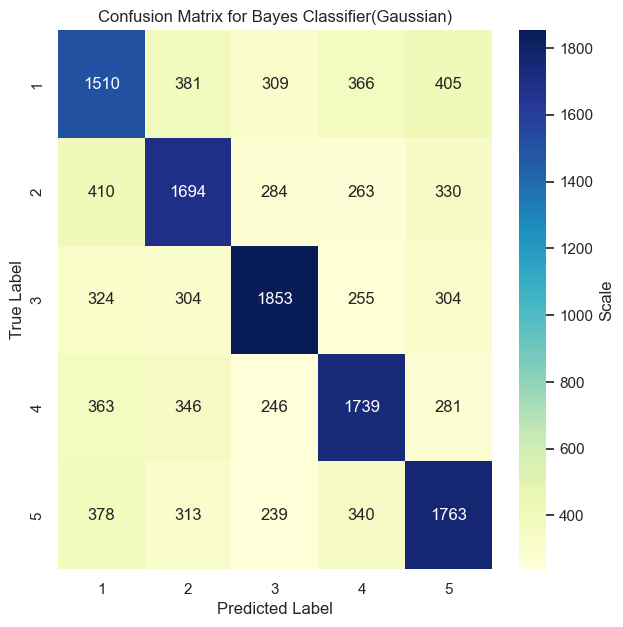

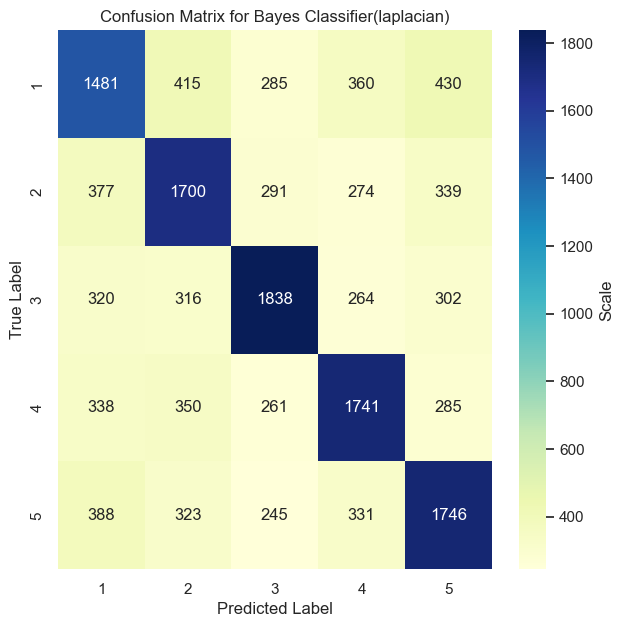

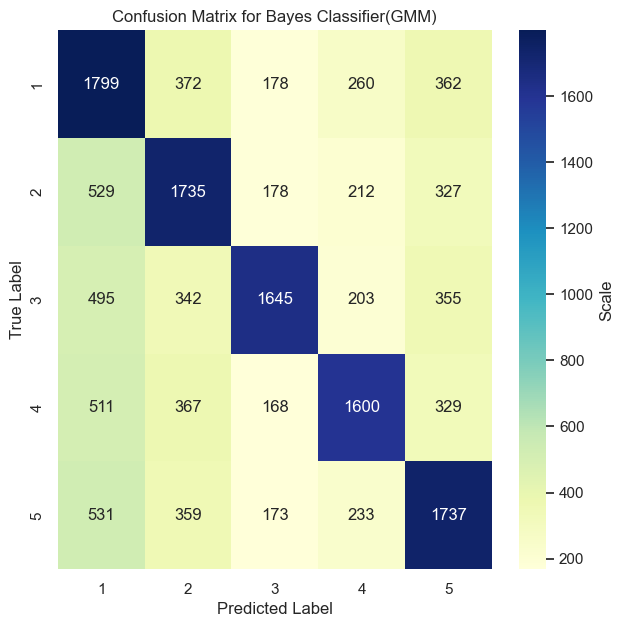

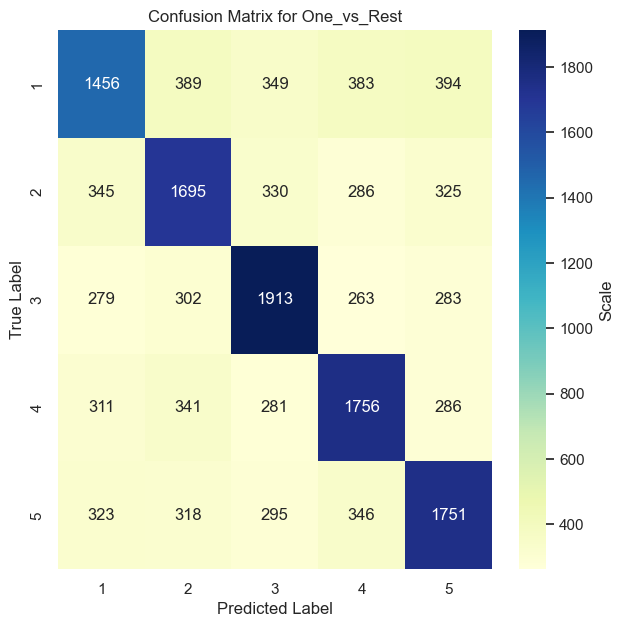

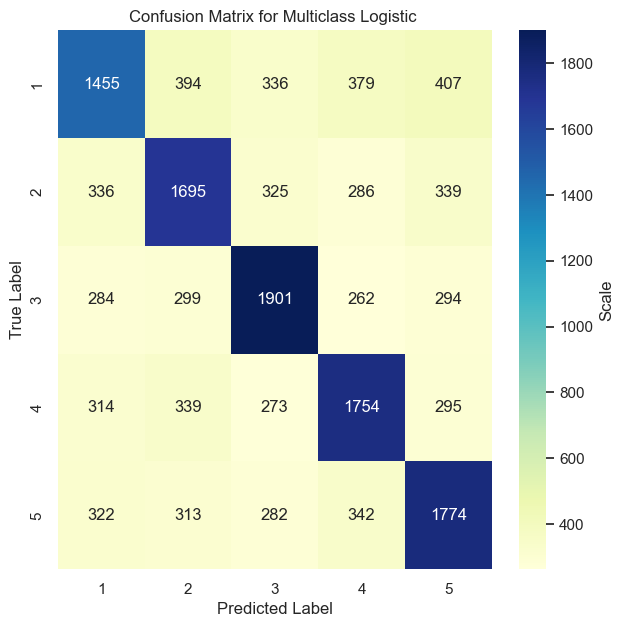

In [110]:
y = np.unique(p3_train[:,-1],return_counts = False)
plot_confusion_matrix(Q3_Gaussian_confusion_matrix,y,"Bayes Classifier(Gaussian)")
plot_confusion_matrix(Q3_Laplacian_confusion_matrix ,y,"Bayes Classifier(laplacian)")
plot_confusion_matrix(Q3_GMM_confusion_matrix,y,"Bayes Classifier(GMM)")
plot_confusion_matrix(Q3_One_vs_Rest_confusion_matrix,y,"One_vs_Rest")
plot_confusion_matrix(Q3_Logistic_Regression_confusion_matrix,y,"Multiclass Logistic ")

### Class-wise F1 scores

In [111]:
Q3_F1_score = [["Bayes Classifier(Gaussian)",Q3_Gaussian_F1_score],["Bayes Classifier(Laplacian)",Q3_Laplacian_F1_score],["GMM",Q3_GMM_F1_score],["One vs Rest",Q3_One_vs_Rest_F1_score],["Multiclass Logistic",Q3_Logistic_Regression_F1_score]]
headers = [" " ,"F1 Scores of 5 Classes"]
print(tabulate(Q3_F1_score , headers, tablefmt="fancy_grid"))

╒═════════════════════════════╤══════════════════════════════════════════════════════════╕
│                             │ F1 Scores of 5 Classes                                   │
╞═════════════════════════════╪══════════════════════════════════════════════════════════╡
│ Bayes Classifier(Gaussian)  │ [0.50705171 0.5628842  0.62066656 0.5857191  0.5765206 ] │
├─────────────────────────────┼──────────────────────────────────────────────────────────┤
│ Bayes Classifier(Laplacian) │ [0.50417021 0.55875103 0.61677852 0.58570227 0.56919315] │
├─────────────────────────────┼──────────────────────────────────────────────────────────┤
│ GMM                         │ [0.52633119 0.56367771 0.61129692 0.5836221  0.56552173] │
├─────────────────────────────┼──────────────────────────────────────────────────────────┤
│ One vs Rest                 │ [0.51222515 0.56256223 0.61630155 0.58445665 0.57674572] │
├─────────────────────────────┼──────────────────────────────────────────────────────────┤

### ROC Curve

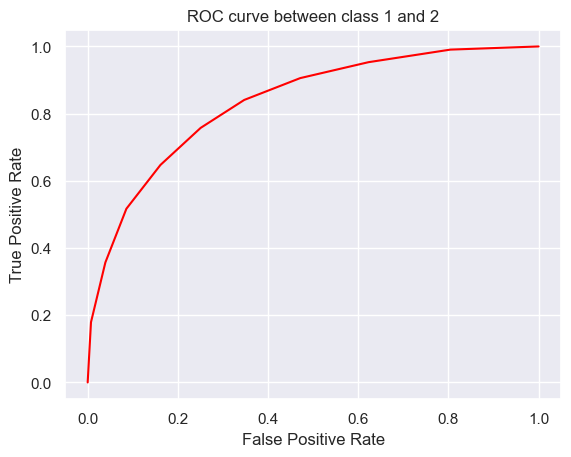

In [103]:
ROC(p3_train,p3_test,1,2)

### Likelihood curve for EM with number of mixtures

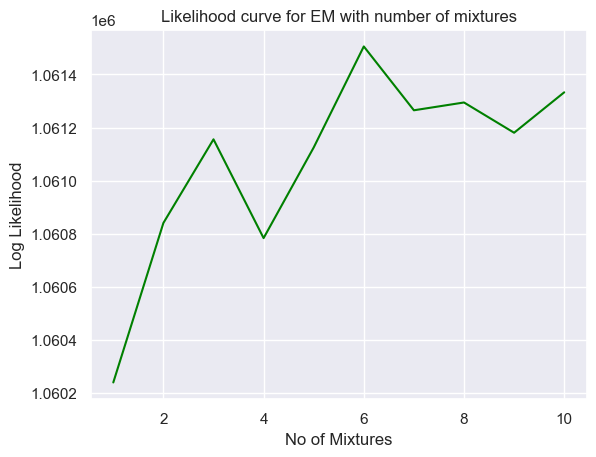

In [112]:
EM_curve(p3_train_normalized)

### Empirical Risk for Logistic Regression

In [115]:
risk_train = Q3_Logistic_Regression.compute_emprical_risk(p3_train)
risk_test = Q3_Logistic_Regression.compute_emprical_risk(p3_test)
print("Empirical Risk for training data: ",risk_train)
print("Empirical Risk for testing data: ",risk_test)

Empirical Risk for training data:  1.1451475158699398
Empirical Risk for testing data:  1.1424510235489989


# Question 4

### Importing Train and Test Datasets

In [116]:
p4 = np.genfromtxt("p4_data.csv", delimiter=",", dtype=float)

### Normalizing Data

In [118]:
p4_normalized = p4.copy()
p4_normalized[:,0:-1] = p4_normalized[:,0:-1]/255

### Spliting data into test and train datasets

In [119]:
p4_train_20_80 = p4_normalized[0:12000,:]
p4_test_20_80 = p4_normalized[12000:,:]

p4_train_30_70 = p4_normalized[0:18000,:]
p4_test_30_70 = p4_normalized[18000:,:]

p4_train_50_50 = p4_normalized[0:30000,:]
p4_test_50_50 = p4_normalized[30000:,:]

p4_train_70_30 = p4_normalized[0:42000,:]
p4_test_70_30 = p4_normalized[42000:,:]

p4_train_90_10 = p4_normalized[0:54000,:]
p4_test_90_10 = p4_normalized[54000:,:]

### Naive Bayes Classifier (Gaussian Class Conditionals)

#### 20:80 Train-Test split

In [120]:
Q4_Naive_Bayes_20_80 = Bayers_Classifier()
Q4_Naive_Bayes_20_80.fit(p4_train_20_80,'Gaussian')
Q4_Naive_Bayes_20_80_pred = Q4_Naive_Bayes_20_80.predict(p4_test_20_80)

In [121]:
Q4_Naive_Bayes_20_80_accuracy = classification_accuracy(Q4_Naive_Bayes_20_80_pred,p4_test_20_80[:,-1])
Q4_Naive_Bayes_20_80_confusion_matrix , Q4_Naive_Bayes_20_80_F1_score = confusion_matrix_and_F1_score(Q4_Naive_Bayes_20_80_pred,p4_test_20_80[:,-1])

#### 30:70 Train-Test split

In [122]:
Q4_Naive_Bayes_30_70 = Bayers_Classifier()
Q4_Naive_Bayes_30_70.fit(p4_train_30_70,'Gaussian')
Q4_Naive_Bayes_30_70_pred = Q4_Naive_Bayes_30_70.predict(p4_test_30_70)

In [123]:
Q4_Naive_Bayes_30_70_accuracy = classification_accuracy(Q4_Naive_Bayes_30_70_pred,p4_test_30_70[:,-1])
Q4_Naive_Bayes_30_70_confusion_matrix , Q4_Naive_Bayes_30_70_F1_score = confusion_matrix_and_F1_score(Q4_Naive_Bayes_30_70_pred,p4_test_30_70[:,-1])

#### 50:50 Train-Test split

In [124]:
Q4_Naive_Bayes_50_50 = Bayers_Classifier()
Q4_Naive_Bayes_50_50.fit(p4_train_50_50,'Gaussian')
Q4_Naive_Bayes_50_50_pred = Q4_Naive_Bayes_50_50.predict(p4_test_50_50)

In [125]:
Q4_Naive_Bayes_50_50_accuracy = classification_accuracy(Q4_Naive_Bayes_50_50_pred,p4_test_50_50[:,-1])
Q4_Naive_Bayes_50_50_confusion_matrix , Q4_Naive_Bayes_50_50_F1_score = confusion_matrix_and_F1_score(Q4_Naive_Bayes_50_50_pred,p4_test_50_50[:,-1])

#### 70:30 Train-Test split

In [126]:
Q4_Naive_Bayes_70_30 = Bayers_Classifier()
Q4_Naive_Bayes_70_30.fit(p4_train_70_30,'Gaussian')
Q4_Naive_Bayes_70_30_pred = Q4_Naive_Bayes_70_30.predict(p4_test_70_30)

In [127]:
Q4_Naive_Bayes_70_30_accuracy = classification_accuracy(Q4_Naive_Bayes_70_30_pred,p4_test_70_30[:,-1])
Q4_Naive_Bayes_70_30_confusion_matrix , Q4_Naive_Bayes_70_30_F1_score = confusion_matrix_and_F1_score(Q4_Naive_Bayes_70_30_pred,p4_test_70_30[:,-1])

#### 90:10 Train-Test split

In [128]:
Q4_Naive_Bayes_90_10 = Bayers_Classifier()
Q4_Naive_Bayes_90_10.fit(p4_train_90_10,'Gaussian')
Q4_Naive_Bayes_90_10_pred = Q4_Naive_Bayes_90_10.predict(p4_test_90_10)

In [129]:
Q4_Naive_Bayes_90_10_accuracy = classification_accuracy(Q4_Naive_Bayes_90_10_pred,p4_test_90_10[:,-1])
Q4_Naive_Bayes_90_10_confusion_matrix , Q4_Naive_Bayes_90_10_F1_score = confusion_matrix_and_F1_score(Q4_Naive_Bayes_90_10_pred,p4_test_90_10[:,-1])

### GMM (with EM Algorithm)

#### 20:80 Train-Test split

In [130]:
Q4_GMM_20_80 = Gaussian_Mixture_Model(4)
Q4_GMM_20_80.GMM_fit(p4_train_20_80,10)
Q4_GMM_20_80_pred = Q4_GMM_20_80.GMM_predict(p4_test_20_80)

In [131]:
Q4_GMM_20_80_accuracy = classification_accuracy(Q4_GMM_20_80_pred,p4_test_20_80[:,-1])
Q4_GMM_20_80_confusion_matrix , Q4_GMM_20_80_F1_score = confusion_matrix_and_F1_score(Q4_GMM_20_80_pred,p4_test_20_80[:,-1])

#### 30:70 Train-Test split

In [132]:
Q4_GMM_30_70 = Gaussian_Mixture_Model(4)
Q4_GMM_30_70.GMM_fit(p4_train_30_70,10)
Q4_GMM_30_70_pred = Q4_GMM_30_70.GMM_predict(p4_test_30_70)

In [133]:
Q4_GMM_30_70_accuracy = classification_accuracy(Q4_GMM_30_70_pred,p4_test_30_70[:,-1])
Q4_GMM_30_70_confusion_matrix , Q4_GMM_30_70_F1_score = confusion_matrix_and_F1_score(Q4_GMM_30_70_pred,p4_test_30_70[:,-1])

#### 50:50 Train-Test split

In [134]:
Q4_GMM_50_50 = Gaussian_Mixture_Model(4)
Q4_GMM_50_50.GMM_fit(p4_train_50_50,10)
Q4_GMM_50_50_pred = Q4_GMM_50_50.GMM_predict(p4_test_50_50)

In [135]:
Q4_GMM_50_50_accuracy = classification_accuracy(Q4_GMM_50_50_pred,p4_test_50_50[:,-1])
Q4_GMM_50_50_confusion_matrix , Q4_GMM_50_50_F1_score = confusion_matrix_and_F1_score(Q4_GMM_50_50_pred,p4_test_50_50[:,-1])

#### 70:30 Train-Test split

In [136]:
Q4_GMM_70_30 = Gaussian_Mixture_Model(4)
Q4_GMM_70_30.GMM_fit(p4_train_70_30,10)
Q4_GMM_70_30_pred = Q4_GMM_70_30.GMM_predict(p4_test_70_30)

In [137]:
Q4_GMM_70_30_accuracy = classification_accuracy(Q4_GMM_70_30_pred,p4_test_70_30[:,-1])
Q4_GMM_70_30_confusion_matrix , Q4_GMM_70_30_F1_score = confusion_matrix_and_F1_score(Q4_GMM_70_30_pred,p4_test_70_30[:,-1])

#### 90:10 Train-Test split

In [138]:
Q4_GMM_90_10 = Gaussian_Mixture_Model(4)
Q4_GMM_90_10.GMM_fit(p4_train_90_10,10)
Q4_GMM_90_10_pred = Q4_GMM_90_10.GMM_predict(p4_test_90_10)

In [139]:
Q4_GMM_90_10_accuracy = classification_accuracy(Q4_GMM_90_10_pred,p4_test_90_10[:,-1])
Q4_GMM_90_10_confusion_matrix , Q4_GMM_90_10_F1_score = confusion_matrix_and_F1_score(Q4_GMM_90_10_pred,p4_test_90_10[:,-1])

### Multiclass Logistic Regression

#### 20:80 Train-Test split

In [140]:
Q4_Logistic_Regression_20_80 = Logistic_Regression()
Q4_Logistic_Regression_20_80.fit(p4_train_20_80,20)
Q4_Logistic_Regression_20_80_pred = Q4_Logistic_Regression_20_80.predict(p4_test_20_80)

In [141]:
Q4_Logistic_Regression_20_80_accuracy = classification_accuracy(Q4_Logistic_Regression_20_80_pred,p4_test_20_80[:,-1])
Q4_Logistic_Regression_20_80_confusion_matrix , Q4_Logistic_Regression_20_80_F1_score = confusion_matrix_and_F1_score(Q4_Logistic_Regression_20_80_pred,p4_test_20_80[:,-1])

#### 30:70 Train-Test split

In [142]:
Q4_Logistic_Regression_30_70 = Logistic_Regression()
Q4_Logistic_Regression_30_70.fit(p4_train_30_70,20)
Q4_Logistic_Regression_30_70_pred = Q4_Logistic_Regression_30_70.predict(p4_test_30_70)

In [143]:
Q4_Logistic_Regression_30_70_accuracy = classification_accuracy(Q4_Logistic_Regression_30_70_pred,p4_test_30_70[:,-1])
Q4_Logistic_Regression_30_70_confusion_matrix , Q4_Logistic_Regression_30_70_F1_score = confusion_matrix_and_F1_score(Q4_Logistic_Regression_30_70_pred,p4_test_30_70[:,-1])

#### 50:50 Train-Test split

In [144]:
Q4_Logistic_Regression_50_50 = Logistic_Regression()
Q4_Logistic_Regression_50_50.fit(p4_train_50_50,20)
Q4_Logistic_Regression_50_50_pred = Q4_Logistic_Regression_50_50.predict(p4_test_50_50)

In [145]:
Q4_Logistic_Regression_50_50_accuracy = classification_accuracy(Q4_Logistic_Regression_50_50_pred,p4_test_50_50[:,-1])
Q4_Logistic_Regression_50_50_confusion_matrix , Q4_Logistic_Regression_50_50_F1_score = confusion_matrix_and_F1_score(Q4_Logistic_Regression_50_50_pred,p4_test_50_50[:,-1])

#### 70:30 Train-Test split

In [146]:
Q4_Logistic_Regression_70_30 = Logistic_Regression()
Q4_Logistic_Regression_70_30.fit(p4_train_70_30,20)
Q4_Logistic_Regression_70_30_pred = Q4_Logistic_Regression_70_30.predict(p4_test_70_30)

In [147]:
Q4_Logistic_Regression_70_30_accuracy = classification_accuracy(Q4_Logistic_Regression_70_30_pred,p4_test_70_30[:,-1])
Q4_Logistic_Regression_70_30_confusion_matrix , Q4_Logistic_Regression_70_30_F1_score = confusion_matrix_and_F1_score(Q4_Logistic_Regression_70_30_pred,p4_test_70_30[:,-1])

#### 90:10 Train-Test split

In [148]:
Q4_Logistic_Regression_90_10 = Logistic_Regression()
Q4_Logistic_Regression_90_10.fit(p4_train_90_10,20)
Q4_Logistic_Regression_90_10_pred = Q4_Logistic_Regression_90_10.predict(p4_test_90_10)

In [149]:
Q4_Logistic_Regression_90_10_accuracy = classification_accuracy(Q4_Logistic_Regression_90_10_pred,p4_test_90_10[:,-1])
Q4_Logistic_Regression_90_10_confusion_matrix , Q4_Logistic_Regression_90_10_F1_score = confusion_matrix_and_F1_score(Q4_Logistic_Regression_90_10_pred,p4_test_90_10[:,-1])

#### Classification Accuracy

In [150]:
Q4_row1 = ["20:80",Q4_Naive_Bayes_20_80_accuracy,Q4_GMM_20_80_accuracy,Q4_Logistic_Regression_20_80_accuracy]
Q4_row2 = ["30:70",Q4_Naive_Bayes_30_70_accuracy,Q4_GMM_30_70_accuracy,Q4_Logistic_Regression_30_70_accuracy]
Q4_row3 = ["50:50",Q4_Naive_Bayes_50_50_accuracy,Q4_GMM_50_50_accuracy,Q4_Logistic_Regression_50_50_accuracy]
Q4_row4 = ["70:30",Q4_Naive_Bayes_70_30_accuracy,Q4_GMM_70_30_accuracy,Q4_Logistic_Regression_70_30_accuracy]
Q4_row5 = ["90:10",Q4_Naive_Bayes_90_10_accuracy,Q4_GMM_90_10_accuracy,Q4_Logistic_Regression_90_10_accuracy]


Q4_Accuracy_Table = [Q4_row1 ,Q4_row2 ,Q4_row3 ,Q4_row4 ,Q4_row5 ]
Q4_headers = ["Train-Test Split Ratio", "Naive Bayes","GMM(4 Mixtures)","Logistic Regression"]
print(tabulate(Q4_Accuracy_Table, Q4_headers, tablefmt="fancy_grid"))

╒══════════════════════════╤═══════════════╤═══════════════════╤═══════════════════════╕
│ Train-Test Split Ratio   │   Naive Bayes │   GMM(4 Mixtures) │   Logistic Regression │
╞══════════════════════════╪═══════════════╪═══════════════════╪═══════════════════════╡
│ 20:80                    │      0.860521 │          0.914271 │              0.912417 │
├──────────────────────────┼───────────────┼───────────────────┼───────────────────────┤
│ 30:70                    │      0.865143 │          0.920238 │              0.921357 │
├──────────────────────────┼───────────────┼───────────────────┼───────────────────────┤
│ 50:50                    │      0.883533 │          0.938467 │              0.944467 │
├──────────────────────────┼───────────────┼───────────────────┼───────────────────────┤
│ 70:30                    │      0.895722 │          0.950056 │              0.950889 │
├──────────────────────────┼───────────────┼───────────────────┼───────────────────────┤
│ 90:10              

#### Confusion Matrix

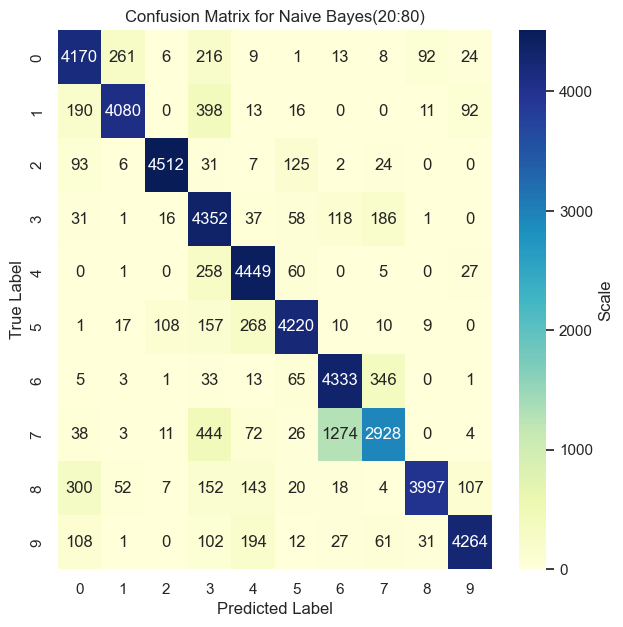

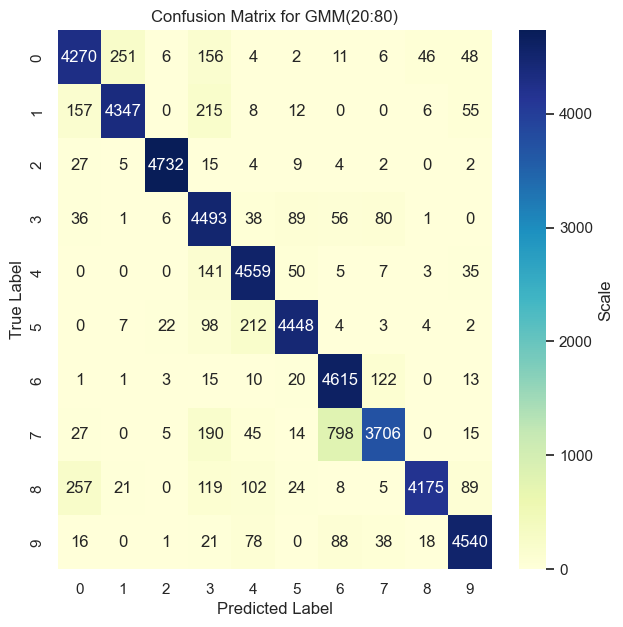

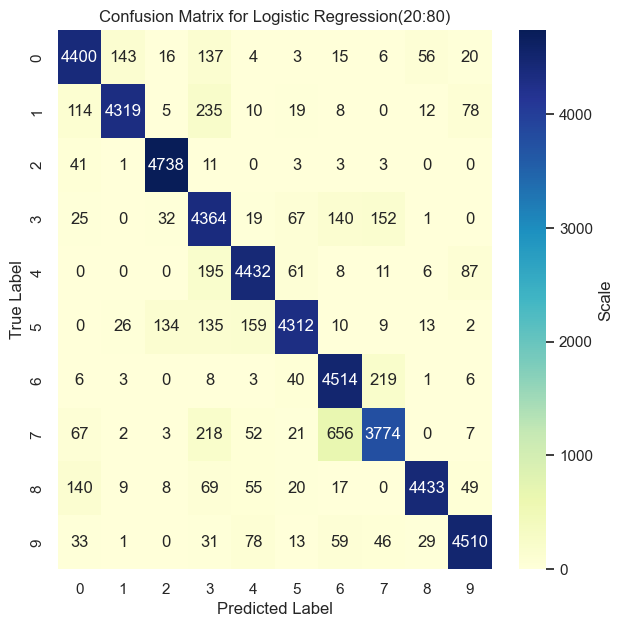

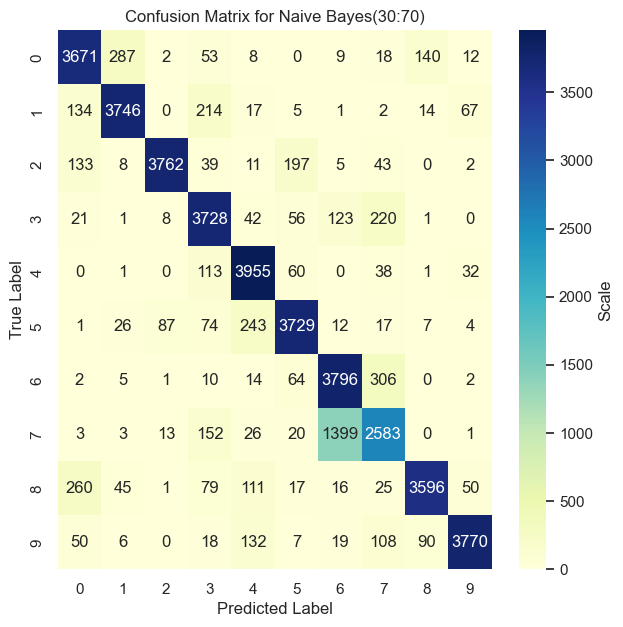

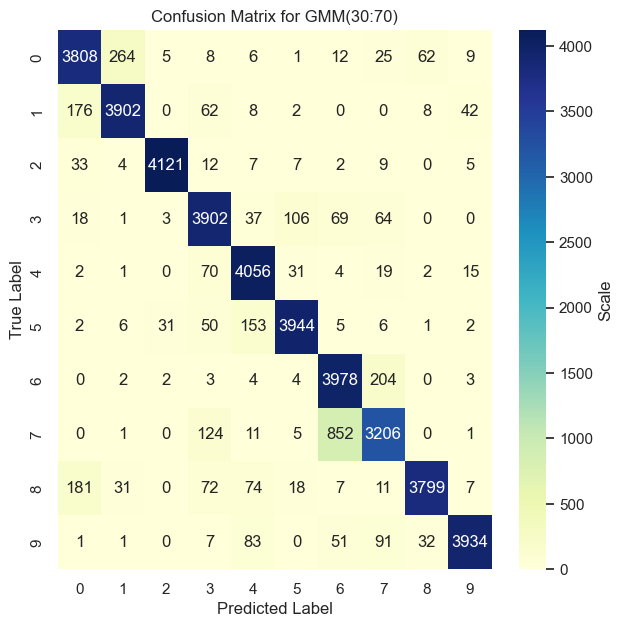

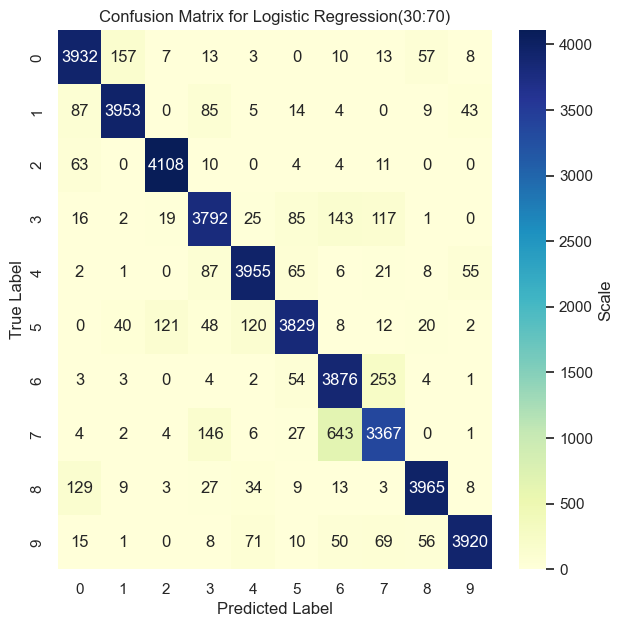

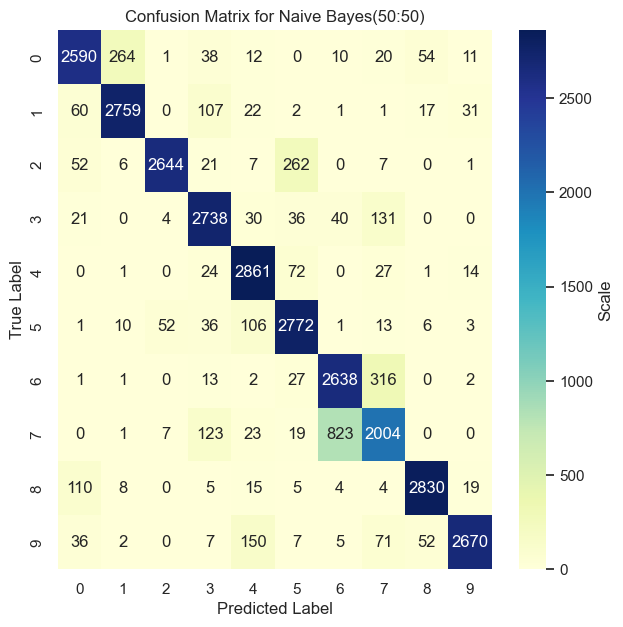

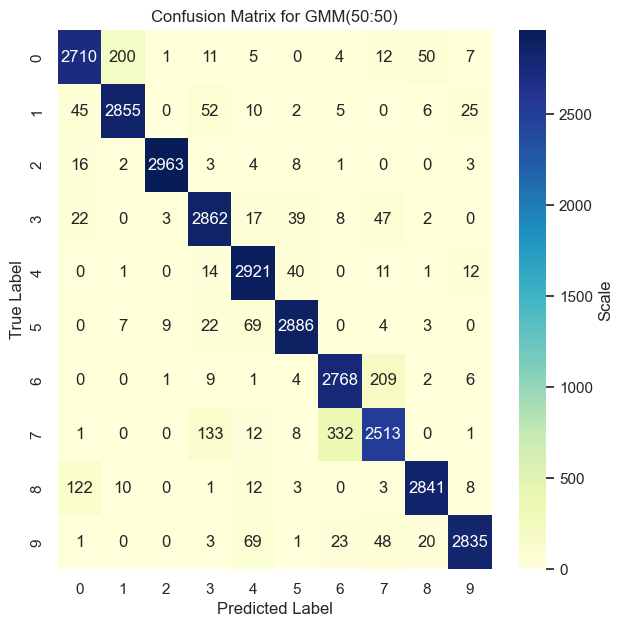

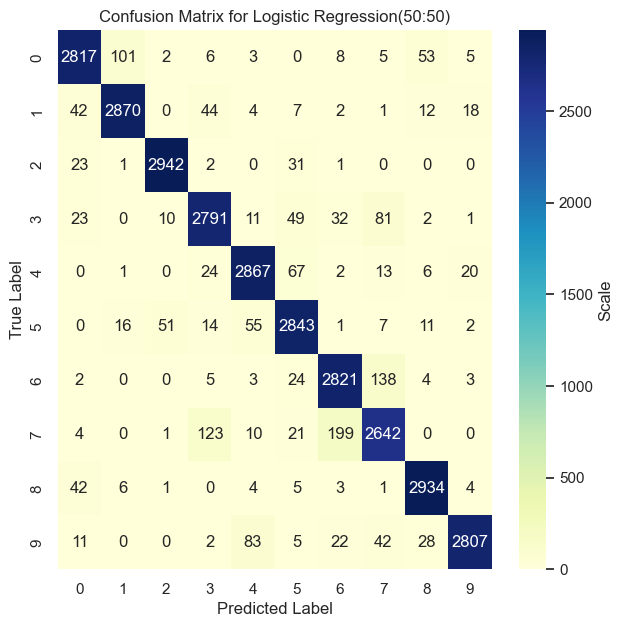

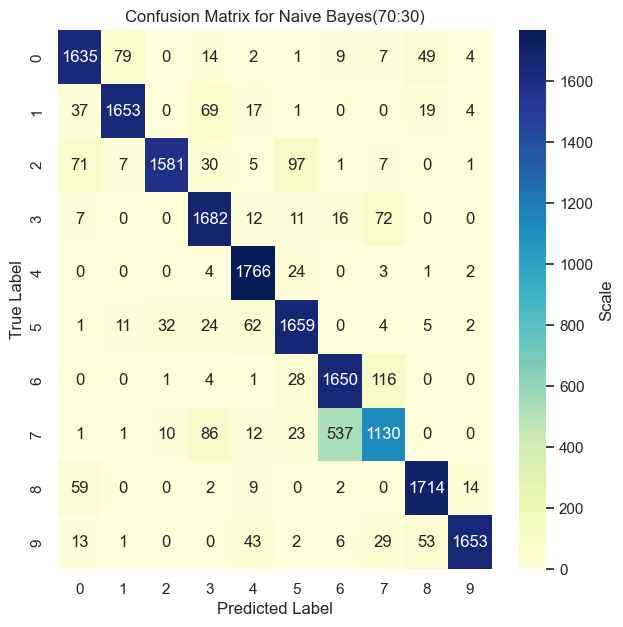

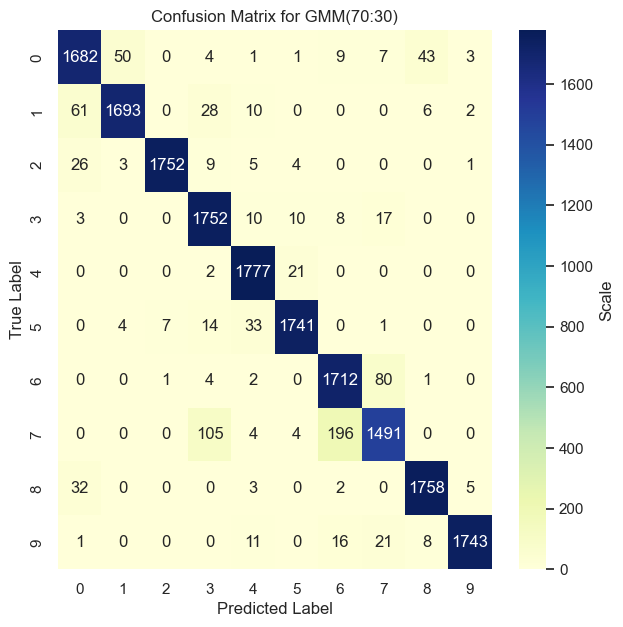

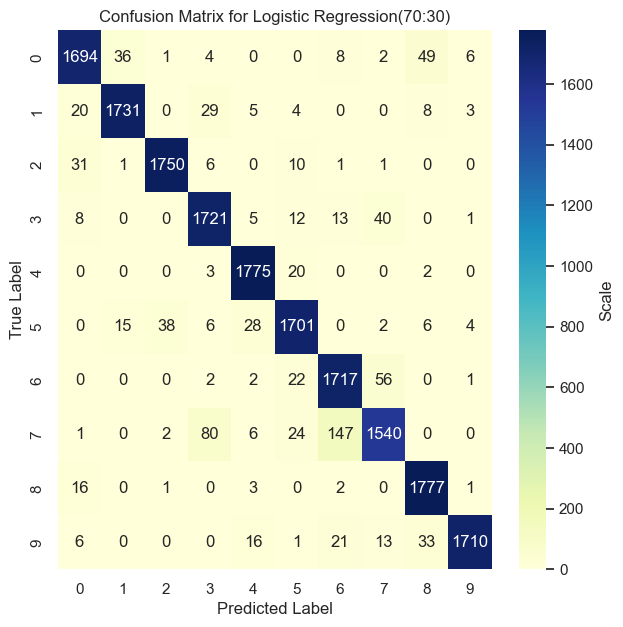

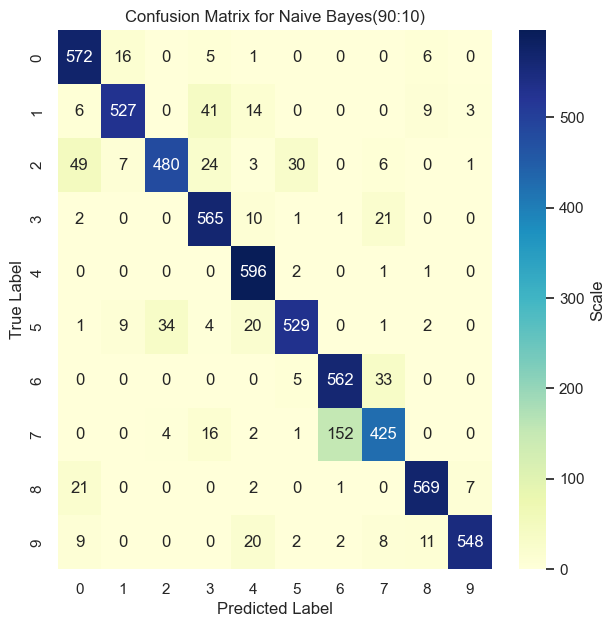

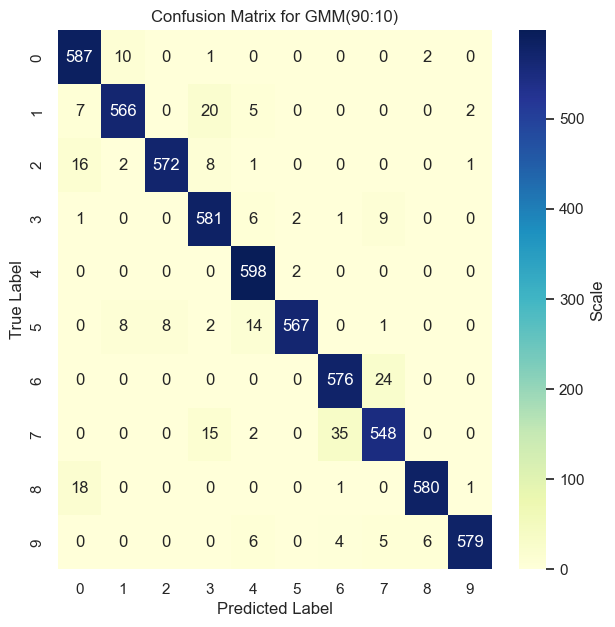

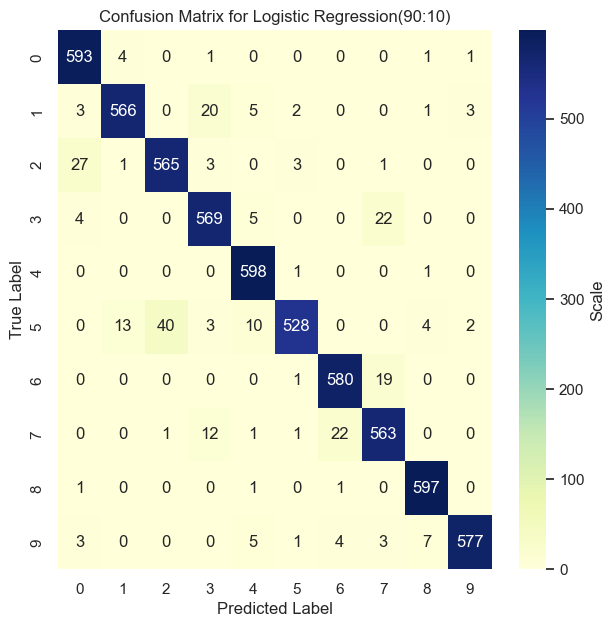

In [151]:
Q4_y = np.unique(p4_test_20_80[:,-1],return_counts = False)

plot_confusion_matrix(Q4_Naive_Bayes_20_80_confusion_matrix,Q4_y ,"Naive Bayes(20:80)")
plot_confusion_matrix(Q4_GMM_20_80_confusion_matrix ,Q4_y ,"GMM(20:80)")
plot_confusion_matrix(Q4_Logistic_Regression_20_80_confusion_matrix ,Q4_y ,"Logistic Regression(20:80)")

plot_confusion_matrix(Q4_Naive_Bayes_30_70_confusion_matrix,Q4_y ,"Naive Bayes(30:70)")
plot_confusion_matrix(Q4_GMM_30_70_confusion_matrix ,Q4_y ,"GMM(30:70)")
plot_confusion_matrix(Q4_Logistic_Regression_30_70_confusion_matrix ,Q4_y ,"Logistic Regression(30:70)")

plot_confusion_matrix(Q4_Naive_Bayes_50_50_confusion_matrix,Q4_y ,"Naive Bayes(50:50)")
plot_confusion_matrix(Q4_GMM_50_50_confusion_matrix ,Q4_y ,"GMM(50:50)")
plot_confusion_matrix(Q4_Logistic_Regression_50_50_confusion_matrix ,Q4_y ,"Logistic Regression(50:50)")

plot_confusion_matrix(Q4_Naive_Bayes_70_30_confusion_matrix,Q4_y ,"Naive Bayes(70:30)")
plot_confusion_matrix(Q4_GMM_70_30_confusion_matrix ,Q4_y ,"GMM(70:30)")
plot_confusion_matrix(Q4_Logistic_Regression_70_30_confusion_matrix ,Q4_y ,"Logistic Regression(70:30)")

plot_confusion_matrix(Q4_Naive_Bayes_90_10_confusion_matrix,Q4_y ,"Naive Bayes(90:10)")
plot_confusion_matrix(Q4_GMM_90_10_confusion_matrix ,Q4_y ,"GMM(90:10)")
plot_confusion_matrix(Q4_Logistic_Regression_90_10_confusion_matrix ,Q4_y ,"Logistic Regression(90:10)")


### Class-wise F1 scores

In [152]:
Q4_row1_f1 = ["Naive Bayes(20:80)",Q4_Naive_Bayes_20_80_F1_score]
Q4_row2_f1 = ["GMM(20:80)",Q4_GMM_20_80_F1_score]
Q4_row3_f1 = ["Logistic Regression(20:80)", Q4_Logistic_Regression_20_80_F1_score]

Q4_row4_f1 = ["Naive Bayes(30:70)",Q4_Naive_Bayes_30_70_F1_score]
Q4_row5_f1 = ["GMM(30:70)",Q4_GMM_30_70_F1_score]
Q4_row6_f1 = ["Logistic Regression(30:70)", Q4_Logistic_Regression_30_70_F1_score]

Q4_row7_f1 = ["Naive Bayes(50:50)",Q4_Naive_Bayes_50_50_F1_score]
Q4_row8_f1 = ["GMM(50:50)",Q4_GMM_50_50_F1_score]
Q4_row9_f1 = ["Logistic Regression(50:50)", Q4_Logistic_Regression_50_50_F1_score]

Q4_row10_f1 = ["Naive Bayes(70:30)",Q4_Naive_Bayes_70_30_F1_score]
Q4_row11_f1 = ["GMM(70:30)",Q4_GMM_70_30_F1_score]
Q4_row12_f1 = ["Logistic Regression(70:30)", Q4_Logistic_Regression_70_30_F1_score]

Q4_row13_f1 = ["Naive Bayes(90:10)",Q4_Naive_Bayes_90_10_F1_score]
Q4_row14_f1 = ["GMM(90:10)",Q4_GMM_90_10_F1_score]
Q4_row15_f1 = ["Logistic Regression(90:10)", Q4_Logistic_Regression_90_10_F1_score]

Q4_F1_score = [Q4_row1_f1,Q4_row2_f1,Q4_row3_f1,Q4_row4_f1,Q4_row5_f1,Q4_row6_f1,Q4_row7_f1,Q4_row8_f1,Q4_row9_f1,Q4_row10_f1,Q4_row11_f1,Q4_row12_f1,Q4_row13_f1,Q4_row14_f1,Q4_row15_f1 ]
Q4_headers_f1 = ["F1 Scores of 10 Classes"]
print(tabulate(Q4_F1_score , Q4_headers_f1, tablefmt="fancy_grid"))

╒════════════════════════════╤════════════════════════════════════════════════════════════════════╕
│                            │ F1 Scores of 10 Classes                                            │
╞════════════════════════════╪════════════════════════════════════════════════════════════════════╡
│ Naive Bayes(20:80)         │ [0.85661463 0.88455285 0.95381038 0.79539432 0.88935532 0.89758588 │
│                            │  0.81793299 0.69947444 0.89408344 0.91511965]                      │
├────────────────────────────┼────────────────────────────────────────────────────────────────────┤
│ GMM(20:80)                 │ [0.8904181  0.92165801 0.98840731 0.87557244 0.92474645 0.93958597 │
│                            │  0.8884397  0.84525031 0.92234618 0.94593187]                      │
├────────────────────────────┼────────────────────────────────────────────────────────────────────┤
│ Logistic Regression(20:80) │ [0.91419073 0.92841788 0.97329499 0.85543468 0.92218061 0.92146597 │


C:\Users\Aniket Tiwari\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tabulate\__init__.py:108: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  or (len(row) >= 2 and row[1] == SEPARATING_LINE)


### ROC Curves

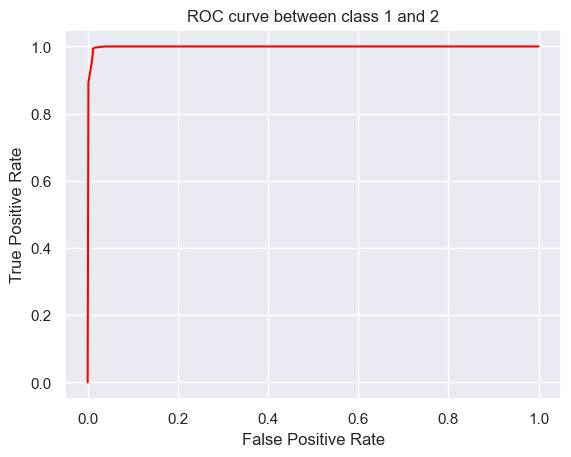

In [153]:
ROC(p4_train_90_10,p4_test_90_10,1,2)


#### Likelihood curve for EM with number of mixtures

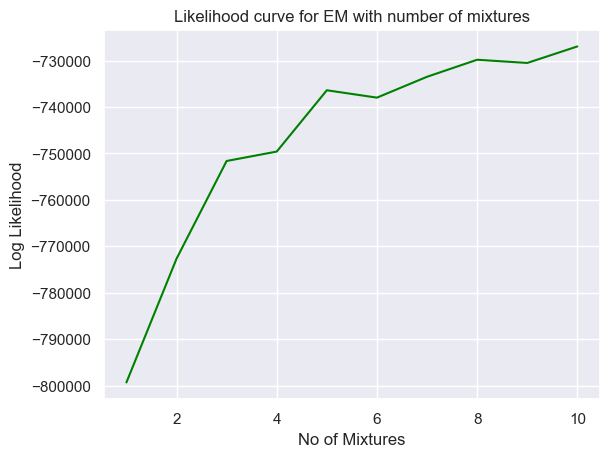

In [163]:
EM_curve(p4_train_90_10)

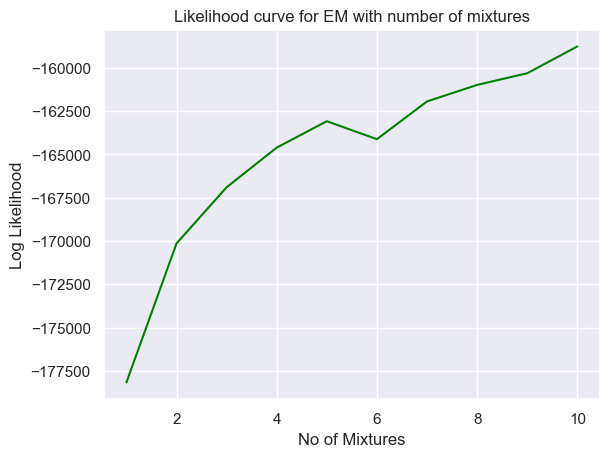

In [164]:
EM_curve(p4_train_20_80)

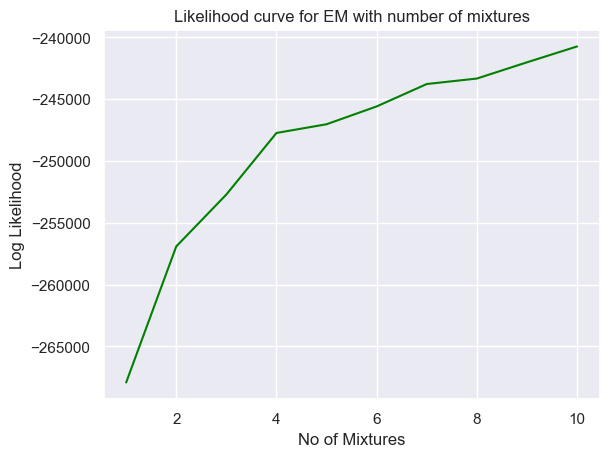

In [165]:
EM_curve(p4_train_30_70)

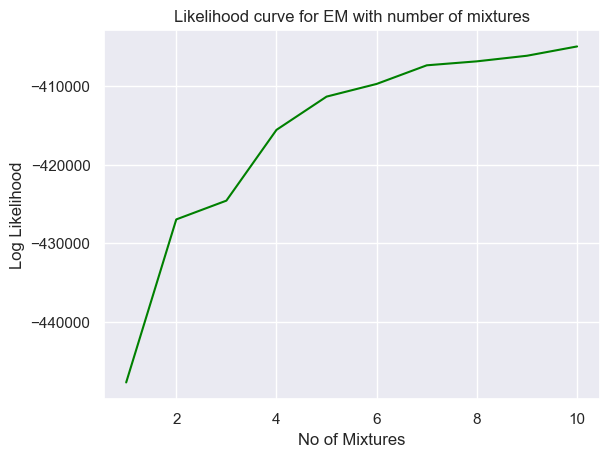

In [166]:
EM_curve(p4_train_50_50)

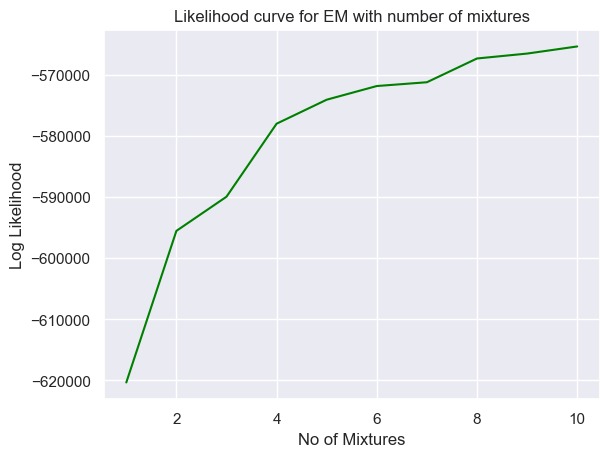

In [167]:
EM_curve(p4_train_70_30)

#### Empirical Risk for Logistic Regression

In [155]:
Q4_row1_ER = ["20:80",Q4_Logistic_Regression_20_80.compute_emprical_risk(p4_train_20_80),Q4_Logistic_Regression_20_80.compute_emprical_risk(p4_test_20_80)]
Q4_row2_ER = ["30:70",Q4_Logistic_Regression_30_70.compute_emprical_risk(p4_train_30_70),Q4_Logistic_Regression_30_70.compute_emprical_risk(p4_test_30_70)]
Q4_row3_ER = ["50:50",Q4_Logistic_Regression_50_50.compute_emprical_risk(p4_train_50_50),Q4_Logistic_Regression_50_50.compute_emprical_risk(p4_test_50_50)]
Q4_row4_ER = ["70:30",Q4_Logistic_Regression_70_30.compute_emprical_risk(p4_train_70_30),Q4_Logistic_Regression_70_30.compute_emprical_risk(p4_test_70_30)]
Q4_row5_ER = ["90:10",Q4_Logistic_Regression_90_10.compute_emprical_risk(p4_train_90_10),Q4_Logistic_Regression_90_10.compute_emprical_risk(p4_test_90_10)]


Q4_ER_score = [Q4_row1_ER,Q4_row2_ER,Q4_row3_ER,Q4_row4_ER,Q4_row5_ER ]
Q4_headers_ER = ["Train","Test"]
print(tabulate(Q4_ER_score , Q4_headers_ER, tablefmt="fancy_grid"))

╒═══════╤══════════╤══════════╕
│       │    Train │     Test │
╞═══════╪══════════╪══════════╡
│ 20:80 │ 0.272109 │ 0.334193 │
├───────┼──────────┼──────────┤
│ 30:70 │ 0.2904   │ 0.308796 │
├───────┼──────────┼──────────┤
│ 50:50 │ 0.30341  │ 0.244017 │
├───────┼──────────┼──────────┤
│ 70:30 │ 0.295282 │ 0.214425 │
├───────┼──────────┼──────────┤
│ 90:10 │ 0.277492 │ 0.20759  │
╘═══════╧══════════╧══════════╛


# Question 5


### Importing Train and Test Datasets

In [15]:
p5 = np.genfromtxt("PCA_MNIST.csv", delimiter=",", dtype=float)

In [16]:
l = p5[1:,:][:,0]
t  =p5[1:,:][:,1:]
p5 = np.column_stack((t,l))

### Normalizing Data

In [17]:
p5_normalized = p5.copy()
#p5_normalized[:,0:-1] = p5_normalized[:,0:-1]/255
for i in range(10):
  p5_normalized[:,i] = (p5_normalized[:,i] - np.min(p5_normalized[:,i]))/(np.max(p5_normalized[:,i])-np.min(p5_normalized[:,i]))

### Spliting data into test and train datasets

In [18]:
p5_train_20_80 = p5_normalized[0:12000,:]
p5_test_20_80 = p5_normalized[12000:,:]

p5_train_30_70 = p5_normalized[0:18000,:]
p5_test_30_70 = p5_normalized[18000:,:]

p5_train_50_50 = p5_normalized[0:30000,:]
p5_test_50_50 = p5_normalized[30000:,:]

p5_train_70_30 = p5_normalized[0:42000,:]
p5_test_70_30 = p5_normalized[42000:,:]

p5_train_90_10 = p5_normalized[0:54000,:]
p5_test_90_10 = p5_normalized[54000:,:]

In [ ]:
p5_train_20_80.shape 

(12000, 11)

### Naive Bayes Classifier (Gaussian Class Conditionals)

#### 20:80 Train-Test split

In [19]:
Q5_Naive_Bayes_20_80 = Bayers_Classifier()
Q5_Naive_Bayes_20_80.fit(p5_train_20_80,'Gaussian')
Q5_Naive_Bayes_20_80_pred = Q5_Naive_Bayes_20_80.predict(p5_test_20_80)

In [20]:
Q5_Naive_Bayes_20_80_accuracy = classification_accuracy(Q5_Naive_Bayes_20_80_pred,p5_test_20_80[:,-1])
Q5_Naive_Bayes_20_80_confusion_matrix , Q5_Naive_Bayes_20_80_F1_score = confusion_matrix_and_F1_score(Q5_Naive_Bayes_20_80_pred,p5_test_20_80[:,-1])

In [21]:
Q5_Naive_Bayes_20_80_accuracy

0.822375

#### 30:70 Train-Test split

In [22]:
Q5_Naive_Bayes_30_70 = Bayers_Classifier()
Q5_Naive_Bayes_30_70.fit(p5_train_30_70,'Gaussian')
Q5_Naive_Bayes_30_70_pred = Q5_Naive_Bayes_30_70.predict(p5_test_30_70)

In [23]:
Q5_Naive_Bayes_30_70_accuracy = classification_accuracy(Q5_Naive_Bayes_30_70_pred,p5_test_30_70[:,-1])
Q5_Naive_Bayes_30_70_confusion_matrix , Q5_Naive_Bayes_30_70_F1_score = confusion_matrix_and_F1_score(Q5_Naive_Bayes_30_70_pred,p5_test_30_70[:,-1])

#### 50:50 Train-Test split

In [24]:
Q5_Naive_Bayes_50_50 = Bayers_Classifier()
Q5_Naive_Bayes_50_50.fit(p5_train_50_50,'Gaussian')
Q5_Naive_Bayes_50_50_pred = Q5_Naive_Bayes_50_50.predict(p5_test_50_50)

In [25]:
Q5_Naive_Bayes_50_50_accuracy = classification_accuracy(Q5_Naive_Bayes_50_50_pred,p5_test_50_50[:,-1])
Q5_Naive_Bayes_50_50_confusion_matrix , Q5_Naive_Bayes_50_50_F1_score = confusion_matrix_and_F1_score(Q5_Naive_Bayes_50_50_pred,p5_test_50_50[:,-1])

#### 70:30 Train-Test split

In [26]:
Q5_Naive_Bayes_70_30 = Bayers_Classifier()
Q5_Naive_Bayes_70_30.fit(p5_train_70_30,'Gaussian')
Q5_Naive_Bayes_70_30_pred = Q5_Naive_Bayes_70_30.predict(p5_test_70_30)

In [27]:
Q5_Naive_Bayes_70_30_accuracy = classification_accuracy(Q5_Naive_Bayes_70_30_pred,p5_test_70_30[:,-1])
Q5_Naive_Bayes_70_30_confusion_matrix , Q5_Naive_Bayes_70_30_F1_score = confusion_matrix_and_F1_score(Q5_Naive_Bayes_70_30_pred,p5_test_70_30[:,-1])

#### 90:10 Train-Test split

In [28]:
Q5_Naive_Bayes_90_10 = Bayers_Classifier()
Q5_Naive_Bayes_90_10.fit(p5_train_90_10,'Gaussian')
Q5_Naive_Bayes_90_10_pred = Q5_Naive_Bayes_90_10.predict(p5_test_90_10)

In [29]:
Q5_Naive_Bayes_90_10_accuracy = classification_accuracy(Q5_Naive_Bayes_90_10_pred,p5_test_90_10[:,-1])
Q5_Naive_Bayes_90_10_confusion_matrix , Q5_Naive_Bayes_90_10_F1_score = confusion_matrix_and_F1_score(Q5_Naive_Bayes_90_10_pred,p5_test_90_10[:,-1])

### GMM (with EM Algorithm)

#### 20:80 Train-Test split

In [30]:
Q5_GMM_20_80 = Gaussian_Mixture_Model(4)
Q5_GMM_20_80.GMM_fit(p5_train_20_80,10)
Q5_GMM_20_80_pred = Q5_GMM_20_80.GMM_predict(p5_test_20_80)

In [31]:
Q5_GMM_20_80_accuracy = classification_accuracy(Q5_GMM_20_80_pred,p5_test_20_80[:,-1])
Q5_GMM_20_80_confusion_matrix , Q5_GMM_20_80_F1_score = confusion_matrix_and_F1_score(Q5_GMM_20_80_pred,p5_test_20_80[:,-1])

#### 30:70 Train-Test split

In [32]:
Q5_GMM_30_70 = Gaussian_Mixture_Model(4)
Q5_GMM_30_70.GMM_fit(p5_train_30_70,10)
Q5_GMM_30_70_pred = Q5_GMM_30_70.GMM_predict(p5_test_30_70)

In [33]:
Q5_GMM_30_70_accuracy = classification_accuracy(Q5_GMM_30_70_pred,p5_test_30_70[:,-1])
Q5_GMM_30_70_confusion_matrix , Q5_GMM_30_70_F1_score = confusion_matrix_and_F1_score(Q5_GMM_30_70_pred,p5_test_30_70[:,-1])

#### 50:50 Train-Test split

In [34]:
Q5_GMM_50_50 = Gaussian_Mixture_Model(4)
Q5_GMM_50_50.GMM_fit(p5_train_50_50,10)
Q5_GMM_50_50_pred = Q5_GMM_50_50.GMM_predict(p5_test_50_50)

In [35]:
Q5_GMM_50_50_accuracy = classification_accuracy(Q5_GMM_50_50_pred,p5_test_50_50[:,-1])
Q5_GMM_50_50_confusion_matrix , Q5_GMM_50_50_F1_score = confusion_matrix_and_F1_score(Q5_GMM_50_50_pred,p5_test_50_50[:,-1])

#### 70:30 Train-Test split

In [36]:
Q5_GMM_70_30 = Gaussian_Mixture_Model(4)
Q5_GMM_70_30.GMM_fit(p5_train_70_30,10)
Q5_GMM_70_30_pred = Q5_GMM_70_30.GMM_predict(p5_test_70_30)

In [37]:
Q5_GMM_70_30_accuracy = classification_accuracy(Q5_GMM_70_30_pred,p5_test_70_30[:,-1])
Q5_GMM_70_30_confusion_matrix , Q5_GMM_70_30_F1_score = confusion_matrix_and_F1_score(Q5_GMM_70_30_pred,p5_test_70_30[:,-1])

#### 90:10 Train-Test split

In [38]:
Q5_GMM_90_10 = Gaussian_Mixture_Model(4)
Q5_GMM_90_10.GMM_fit(p5_train_90_10,10)
Q5_GMM_90_10_pred = Q5_GMM_90_10.GMM_predict(p5_test_90_10)

In [39]:
Q5_GMM_90_10_accuracy = classification_accuracy(Q5_GMM_90_10_pred,p5_test_90_10[:,-1])
Q5_GMM_90_10_confusion_matrix , Q5_GMM_90_10_F1_score = confusion_matrix_and_F1_score(Q5_GMM_90_10_pred,p5_test_90_10[:,-1])

### Multiclass Logistic Regression

#### 20:80 Train-Test split

In [40]:
Q5_Logistic_Regression_20_80 = Logistic_Regression()
Q5_Logistic_Regression_20_80.fit(p5_train_20_80,20)
Q5_Logistic_Regression_20_80_pred = Q5_Logistic_Regression_20_80.predict(p5_test_20_80)

In [41]:
Q5_Logistic_Regression_20_80_accuracy = classification_accuracy(Q5_Logistic_Regression_20_80_pred,p5_test_20_80[:,-1])
Q5_Logistic_Regression_20_80_confusion_matrix , Q5_Logistic_Regression_20_80_F1_score = confusion_matrix_and_F1_score(Q5_Logistic_Regression_20_80_pred,p5_test_20_80[:,-1])

#### 30:70 Train-Test split

In [42]:
Q5_Logistic_Regression_30_70 = Logistic_Regression()
Q5_Logistic_Regression_30_70.fit(p5_train_30_70,20)
Q5_Logistic_Regression_30_70_pred = Q5_Logistic_Regression_30_70.predict(p5_test_30_70)

In [43]:
Q5_Logistic_Regression_30_70_accuracy = classification_accuracy(Q5_Logistic_Regression_30_70_pred,p5_test_30_70[:,-1])
Q5_Logistic_Regression_30_70_confusion_matrix , Q5_Logistic_Regression_30_70_F1_score = confusion_matrix_and_F1_score(Q5_Logistic_Regression_30_70_pred,p5_test_30_70[:,-1])

#### 50:50 Train-Test split

In [44]:
Q5_Logistic_Regression_50_50 = Logistic_Regression()
Q5_Logistic_Regression_50_50.fit(p5_train_50_50,20)
Q5_Logistic_Regression_50_50_pred = Q5_Logistic_Regression_50_50.predict(p5_test_50_50)

In [45]:
Q5_Logistic_Regression_50_50_accuracy = classification_accuracy(Q5_Logistic_Regression_50_50_pred,p5_test_50_50[:,-1])
Q5_Logistic_Regression_50_50_confusion_matrix , Q5_Logistic_Regression_50_50_F1_score = confusion_matrix_and_F1_score(Q5_Logistic_Regression_50_50_pred,p5_test_50_50[:,-1])

#### 70:30 Train-Test split

In [46]:
Q5_Logistic_Regression_70_30 = Logistic_Regression()
Q5_Logistic_Regression_70_30.fit(p5_train_70_30,20)
Q5_Logistic_Regression_70_30_pred = Q5_Logistic_Regression_70_30.predict(p5_test_70_30)

In [47]:
Q5_Logistic_Regression_70_30_accuracy = classification_accuracy(Q5_Logistic_Regression_70_30_pred,p5_test_70_30[:,-1])
Q5_Logistic_Regression_70_30_confusion_matrix , Q5_Logistic_Regression_70_30_F1_score = confusion_matrix_and_F1_score(Q5_Logistic_Regression_70_30_pred,p5_test_70_30[:,-1])

#### 90:10 Train-Test split

In [48]:
Q5_Logistic_Regression_90_10 = Logistic_Regression()
Q5_Logistic_Regression_90_10.fit(p5_train_90_10,20)
Q5_Logistic_Regression_90_10_pred = Q5_Logistic_Regression_90_10.predict(p5_test_90_10)

In [49]:
Q5_Logistic_Regression_90_10_accuracy = classification_accuracy(Q5_Logistic_Regression_90_10_pred,p5_test_90_10[:,-1])
Q5_Logistic_Regression_90_10_confusion_matrix , Q5_Logistic_Regression_90_10_F1_score = confusion_matrix_and_F1_score(Q5_Logistic_Regression_90_10_pred,p5_test_90_10[:,-1])

#### Classification Accuracy

In [50]:
Q5_row1 = ["20:80",Q5_Naive_Bayes_20_80_accuracy,Q5_GMM_20_80_accuracy,Q5_Logistic_Regression_20_80_accuracy]
Q5_row2 = ["30:70",Q5_Naive_Bayes_30_70_accuracy,Q5_GMM_30_70_accuracy,Q5_Logistic_Regression_30_70_accuracy]
Q5_row3 = ["50:50",Q5_Naive_Bayes_50_50_accuracy,Q5_GMM_50_50_accuracy,Q5_Logistic_Regression_50_50_accuracy]
Q5_row4 = ["70:30",Q5_Naive_Bayes_70_30_accuracy,Q5_GMM_70_30_accuracy,Q5_Logistic_Regression_70_30_accuracy]
Q5_row5 = ["90:10",Q5_Naive_Bayes_90_10_accuracy,Q5_GMM_90_10_accuracy,Q5_Logistic_Regression_90_10_accuracy]


Q5_Accuracy_Table = [Q5_row1 ,Q5_row2 ,Q5_row3 ,Q5_row4 ,Q5_row5 ]
Q5_headers = ["Train-Test Split Ratio", "Naive Bayes","GMM(4 Mixtures)","Logistic Regression"]
print(tabulate(Q5_Accuracy_Table, Q5_headers, tablefmt="fancy_grid"))

╒══════════════════════════╤═══════════════╤═══════════════════╤═══════════════════════╕
│ Train-Test Split Ratio   │   Naive Bayes │   GMM(4 Mixtures) │   Logistic Regression │
╞══════════════════════════╪═══════════════╪═══════════════════╪═══════════════════════╡
│ 20:80                    │      0.822375 │          0.822375 │              0.800479 │
├──────────────────────────┼───────────────┼───────────────────┼───────────────────────┤
│ 30:70                    │      0.829643 │          0.829643 │              0.796952 │
├──────────────────────────┼───────────────┼───────────────────┼───────────────────────┤
│ 50:50                    │      0.8379   │          0.8379   │              0.8088   │
├──────────────────────────┼───────────────┼───────────────────┼───────────────────────┤
│ 70:30                    │      0.857667 │          0.857667 │              0.8105   │
├──────────────────────────┼───────────────┼───────────────────┼───────────────────────┤
│ 90:10              

#### Confusion Matrix

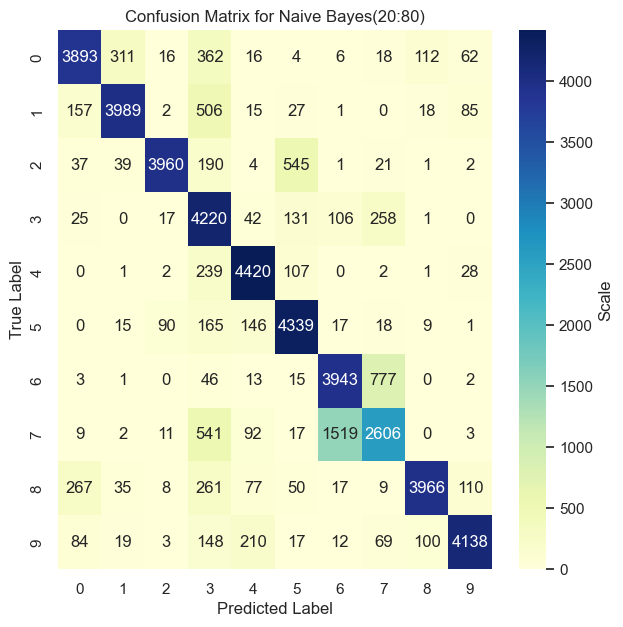

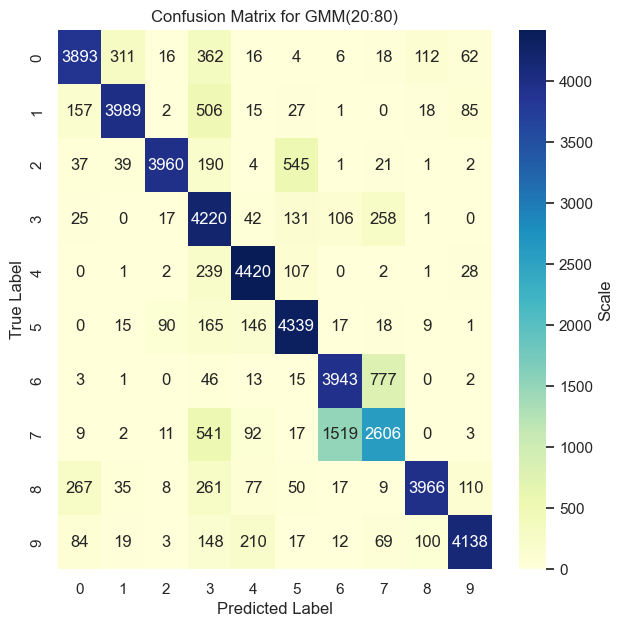

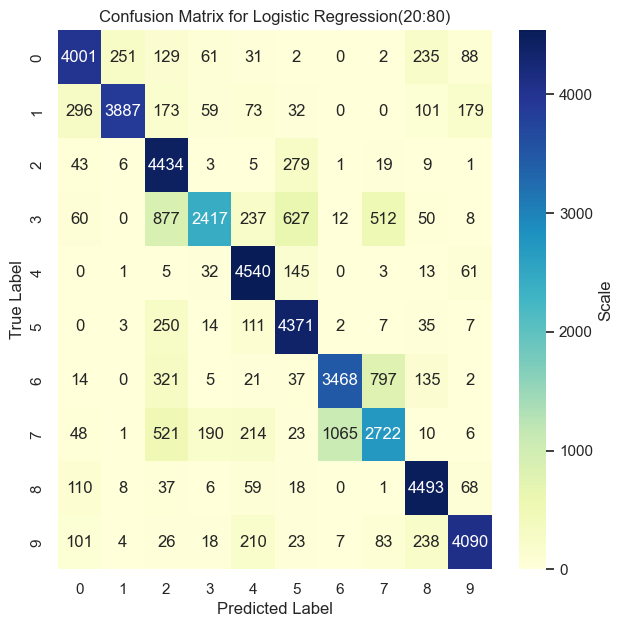

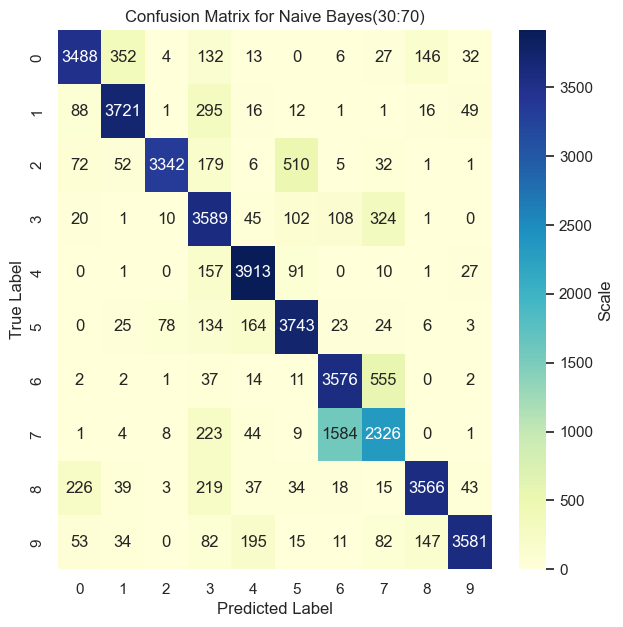

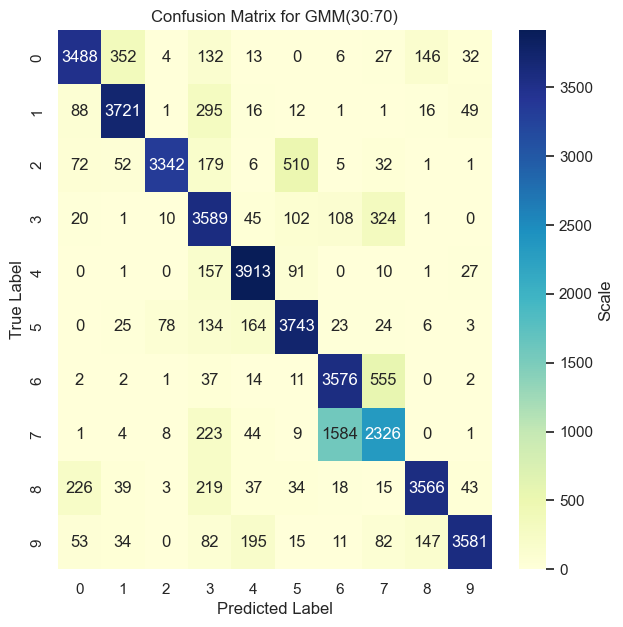

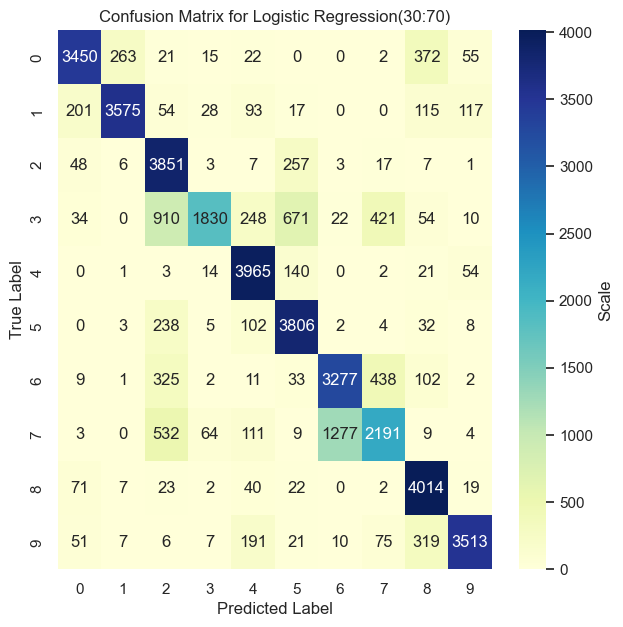

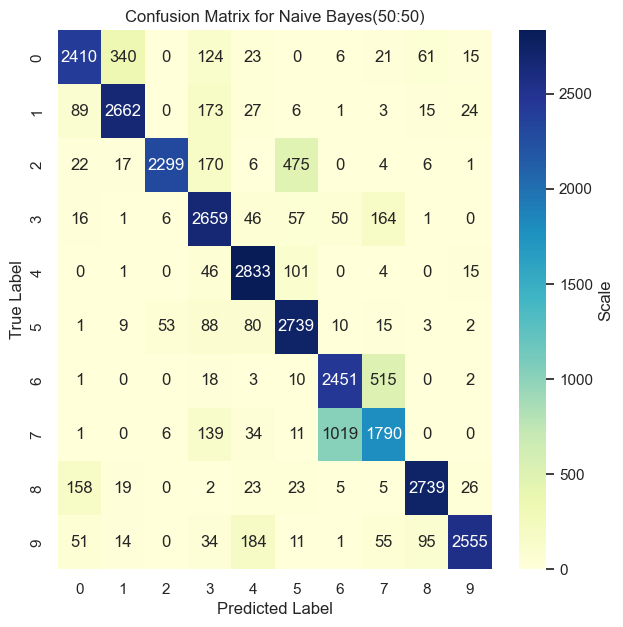

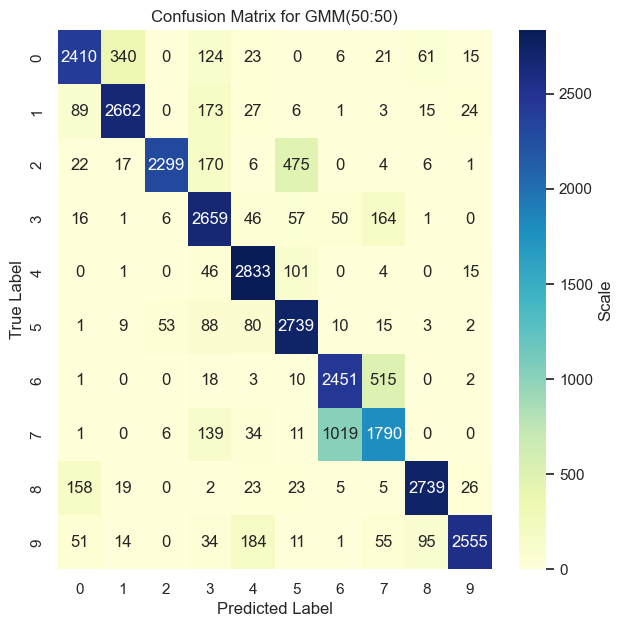

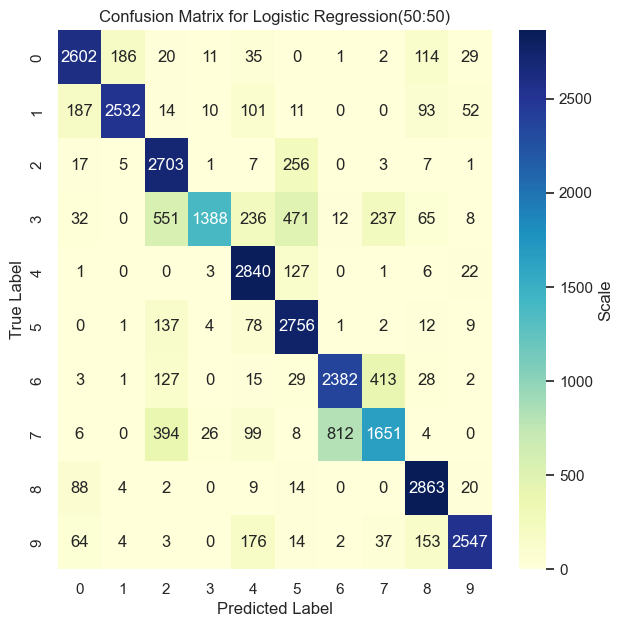

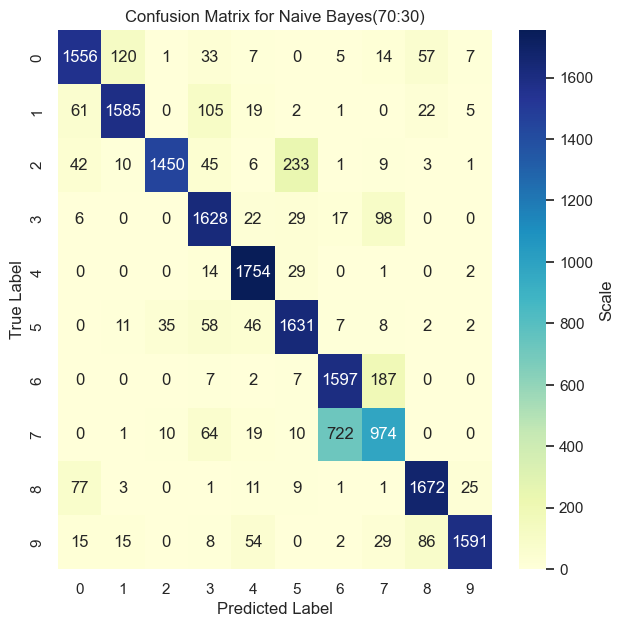

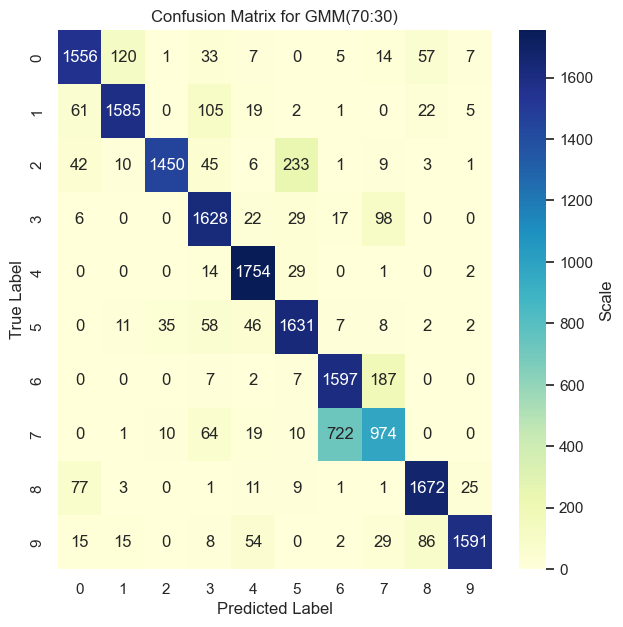

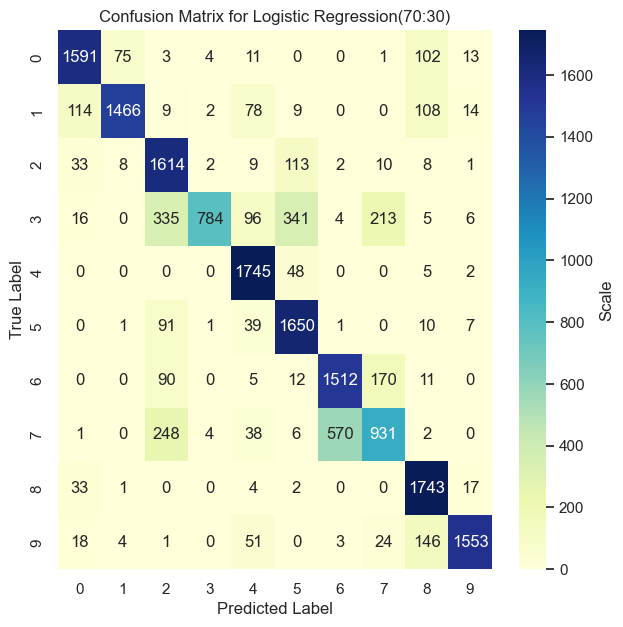

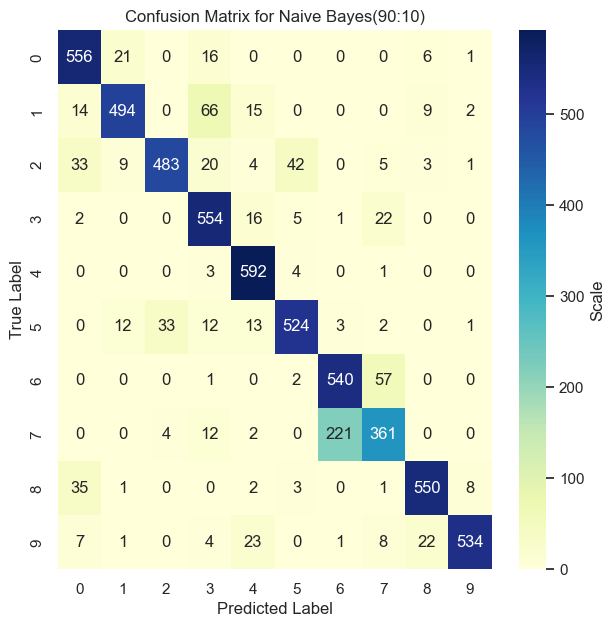

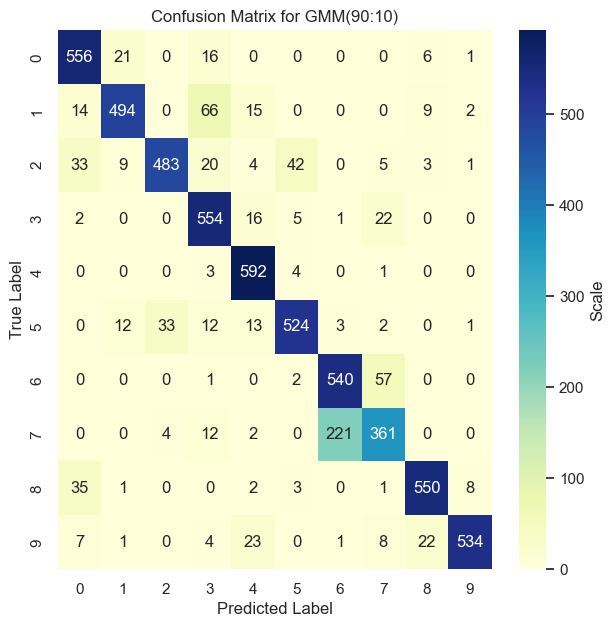

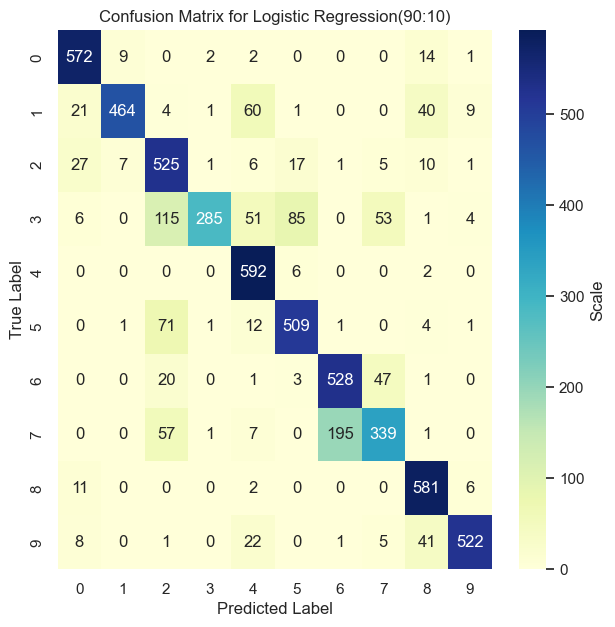

In [55]:
Q5_y = np.unique(p5_test_20_80[:,-1],return_counts = False)

plot_confusion_matrix(Q5_Naive_Bayes_20_80_confusion_matrix,Q5_y ,"Naive Bayes(20:80)")
plot_confusion_matrix(Q5_GMM_20_80_confusion_matrix ,Q5_y ,"GMM(20:80)")
plot_confusion_matrix(Q5_Logistic_Regression_20_80_confusion_matrix ,Q5_y ,"Logistic Regression(20:80)")

plot_confusion_matrix(Q5_Naive_Bayes_30_70_confusion_matrix,Q5_y ,"Naive Bayes(30:70)")
plot_confusion_matrix(Q5_GMM_30_70_confusion_matrix ,Q5_y ,"GMM(30:70)")
plot_confusion_matrix(Q5_Logistic_Regression_30_70_confusion_matrix ,Q5_y ,"Logistic Regression(30:70)")

plot_confusion_matrix(Q5_Naive_Bayes_50_50_confusion_matrix,Q5_y ,"Naive Bayes(50:50)")
plot_confusion_matrix(Q5_GMM_50_50_confusion_matrix ,Q5_y ,"GMM(50:50)")
plot_confusion_matrix(Q5_Logistic_Regression_50_50_confusion_matrix ,Q5_y ,"Logistic Regression(50:50)")

plot_confusion_matrix(Q5_Naive_Bayes_70_30_confusion_matrix,Q5_y ,"Naive Bayes(70:30)")
plot_confusion_matrix(Q5_GMM_70_30_confusion_matrix ,Q5_y ,"GMM(70:30)")
plot_confusion_matrix(Q5_Logistic_Regression_70_30_confusion_matrix ,Q5_y ,"Logistic Regression(70:30)")

plot_confusion_matrix(Q5_Naive_Bayes_90_10_confusion_matrix,Q5_y ,"Naive Bayes(90:10)")
plot_confusion_matrix(Q5_GMM_90_10_confusion_matrix ,Q5_y ,"GMM(90:10)")
plot_confusion_matrix(Q5_Logistic_Regression_90_10_confusion_matrix ,Q5_y ,"Logistic Regression(90:10)")


### Class-wise F1 scores

In [57]:
Q5_row1_f1 = ["Naive Bayes(20:80)",Q5_Naive_Bayes_20_80_F1_score]
Q5_row2_f1 = ["GMM(20:80)",Q5_GMM_20_80_F1_score]
Q5_row3_f1 = ["Logistic Regression(20:80)", Q5_Logistic_Regression_20_80_F1_score]

Q5_row4_f1 = ["Naive Bayes(30:70)",Q5_Naive_Bayes_30_70_F1_score]
Q5_row5_f1 = ["GMM(30:70)",Q5_GMM_30_70_F1_score]
Q5_row6_f1 = ["Logistic Regression(30:70)", Q5_Logistic_Regression_30_70_F1_score]

Q5_row7_f1 = ["Naive Bayes(50:50)",Q5_Naive_Bayes_50_50_F1_score]
Q5_row8_f1 = ["GMM(50:50)",Q5_GMM_50_50_F1_score]
Q5_row9_f1 = ["Logistic Regression(50:50)", Q5_Logistic_Regression_50_50_F1_score]

Q5_row10_f1 = ["Naive Bayes(70:30)",Q5_Naive_Bayes_70_30_F1_score]
Q5_row11_f1 = ["GMM(70:30)",Q5_GMM_70_30_F1_score]
Q5_row12_f1 = ["Logistic Regression(70:30)", Q5_Logistic_Regression_70_30_F1_score]

Q5_row13_f1 = ["Naive Bayes(90:10)",Q5_Naive_Bayes_90_10_F1_score]
Q5_row14_f1 = ["GMM(90:10)",Q5_GMM_90_10_F1_score]
Q5_row15_f1 = ["Logistic Regression(90:10)", Q5_Logistic_Regression_90_10_F1_score]

Q5_F1_score = [Q5_row1_f1,Q5_row2_f1,Q5_row3_f1,Q5_row4_f1,Q5_row5_f1,Q5_row6_f1,Q5_row7_f1,Q5_row8_f1,Q5_row9_f1,Q5_row10_f1,Q5_row11_f1,Q5_row12_f1,Q5_row13_f1,Q5_row14_f1,Q5_row15_f1 ]
Q5_headers_f1 = ["F1 Scores of 10 Classes"]
print(tabulate(Q5_F1_score , Q5_headers_f1, tablefmt="fancy_grid"))

╒════════════════════════════╤════════════════════════════════════════════════════════════════════╕
│                            │ F1 Scores of 10 Classes                                            │
╞════════════════════════════╪════════════════════════════════════════════════════════════════════╡
│ Naive Bayes(20:80)         │ [0.83946092 0.86604429 0.88898866 0.73531974 0.89883071 0.86331078 │
│                            │  0.75666859 0.60760084 0.88055062 0.89654425]                      │
├────────────────────────────┼────────────────────────────────────────────────────────────────────┤
│ GMM(20:80)                 │ [0.83946092 0.86604429 0.88898866 0.73531974 0.89883071 0.86331078 │
│                            │  0.75666859 0.60760084 0.88055062 0.89654425]                      │
├────────────────────────────┼────────────────────────────────────────────────────────────────────┤
│ Logistic Regression(20:80) │ [0.84471656 0.86753711 0.76626631 0.63563445 0.88146782 0.84406681 │


### ROC Curves

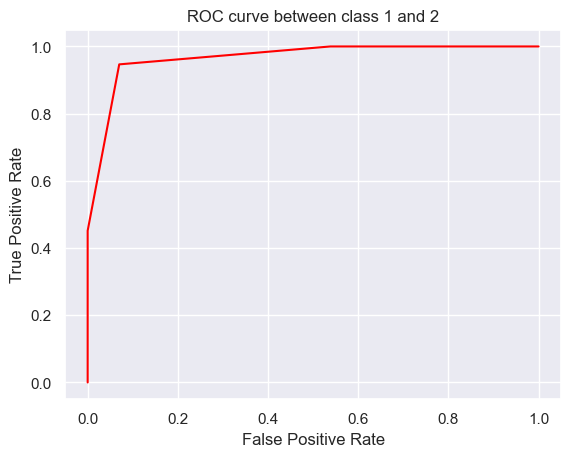

In [62]:
ROC(p5_train_90_10,p5_test_90_10,1,2)


#### Likelihood curve for EM with number of mixtures

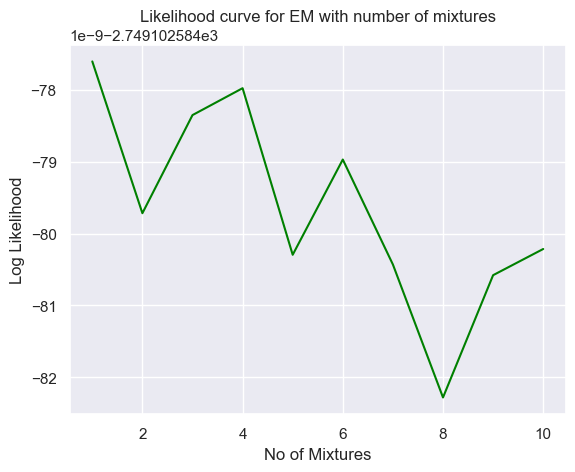

In [162]:
EM_curve(p5_train_90_10)

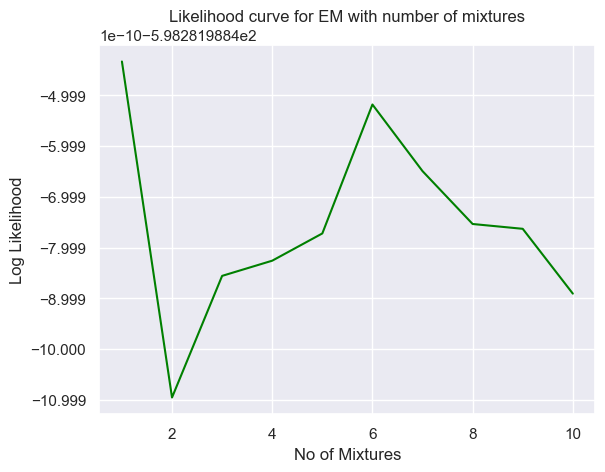

In [168]:
EM_curve(p5_train_20_80)

#### Empirical Risk for Logistic Regression

In [63]:
Q5_row1_ER = ["20:80",Q5_Logistic_Regression_20_80.compute_emprical_risk(p5_train_20_80),Q5_Logistic_Regression_20_80.compute_emprical_risk(p5_test_20_80)]
Q5_row2_ER = ["30:70",Q5_Logistic_Regression_30_70.compute_emprical_risk(p5_train_30_70),Q5_Logistic_Regression_30_70.compute_emprical_risk(p5_test_30_70)]
Q5_row3_ER = ["50:50",Q5_Logistic_Regression_50_50.compute_emprical_risk(p5_train_50_50),Q5_Logistic_Regression_50_50.compute_emprical_risk(p5_test_50_50)]
Q5_row4_ER = ["70:30",Q5_Logistic_Regression_70_30.compute_emprical_risk(p5_train_70_30),Q5_Logistic_Regression_70_30.compute_emprical_risk(p5_test_70_30)]
Q5_row5_ER = ["90:10",Q5_Logistic_Regression_90_10.compute_emprical_risk(p5_train_90_10),Q5_Logistic_Regression_90_10.compute_emprical_risk(p5_test_90_10)]


Q5_ER_score = [Q5_row1_ER,Q5_row2_ER,Q5_row3_ER,Q5_row4_ER,Q5_row5_ER ]
Q5_headers_ER = ["Train","Test"]
print(tabulate(Q5_ER_score , Q5_headers_ER, tablefmt="fancy_grid"))

╒═══════╤═════════╤═════════╕
│       │   Train │    Test │
╞═══════╪═════════╪═════════╡
│ 20:80 │ 1.99508 │ 1.98856 │
├───────┼─────────┼─────────┤
│ 30:70 │ 1.99127 │ 1.98557 │
├───────┼─────────┼─────────┤
│ 50:50 │ 1.99721 │ 1.97809 │
├───────┼─────────┼─────────┤
│ 70:30 │ 1.99367 │ 1.96379 │
├───────┼─────────┼─────────┤
│ 90:10 │ 1.9793  │ 1.95687 │
╘═══════╧═════════╧═════════╛
